In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Scoring
from sklearn.metrics import mean_squared_error


### Data cleaning

In [59]:
class ModelData():
    def __init__(self):
        ## Import Raw Datasets
        self.data = pd.read_csv('./datasets/train.csv')
        self.data_raw = self.data.copy()
        self.testing_data = pd.read_csv('./datasets/test.csv')
        
        ## Clean data
        column_dict = {
                        'Id': 'id',
                        'PID': 'pid',
                        'MS SubClass': 'ms_subclass',
                        'MS Zoning': 'ms_zoning',
                        'Lot Frontage': 'frontage',
                        'Lot Area': 'lot_sqft',
                        'Street': 'street_material',
                        'Alley': 'alley',
                        'Lot Shape': 'shape',
                        'Land Contour': 'contour',
                        'Utilities': 'utilities',
                        'Lot Config': 'config',
                        'Land Slope': 'slope',
                        'Neighborhood': 'neighborhood',
                        'Condition 1': 'cond_1',
                        'Condition 2': 'cond_2',
                        'Bldg Type': 'type',
                        'House Style': 'style',
                        'Overall Qual': 'quality',
                        'Overall Cond': 'condition',
                        'Year Built': 'year',
                        'Year Remod/Add': 'remod_year',
                        'Roof Style': 'roof',
                        'Roof Matl': 'roof_mat',
                        'Exterior 1st': 'ext_1',
                        'Exterior 2nd': 'ext_2',
                        'Mas Vnr Type': 'mas_vnr_type',
                        'Mas Vnr Area': 'mas_vnr_area',
                        'Exter Qual': 'exter_qual',
                        'Exter Cond': 'exter_cond',
                        'Foundation': 'foundation',
                        'Bsmt Qual': 'basement_qual',
                        'Bsmt Cond': 'basement_cond',
                        'Bsmt Exposure': 'basement_exposure',
                        'BsmtFin Type 1': 'basement_fin_1',
                        'BsmtFin SF 1': 'basement_fin_sqft_1',
                        'BsmtFin Type 2': 'basement_fin_2',
                        'BsmtFin SF 2': 'basement_fin_sqft_2',
                        'Bsmt Unf SF': 'basement_unfin_sqft',
                        'Total Bsmt SF': 'total_basement_sqft',
                        'Heating': 'heating',
                        'Heating QC': 'heating_qc',
                        'Central Air': 'ac',
                        'Electrical': 'electrical',
                        '1st Flr SF': 'sqft_1',
                        '2nd Flr SF': 'sqft_2',
                        'Low Qual Fin SF': 'low_qual_sqft',
                        'Gr Liv Area': 'gr_living_sqft',
                        'Bsmt Full Bath': 'basement_bath',
                        'Bsmt Half Bath': 'basement_half_bath',
                        'Full Bath': 'full_bath',
                        'Half Bath': 'half_bath',
                        'Bedroom AbvGr': 'bed',
                        'Kitchen AbvGr': 'kitchen',
                        'Kitchen Qual': 'kitchen_qual',
                        'TotRms AbvGrd': 'rooms_total',
                        'Functional': 'functional',
                        'Fireplaces': 'fireplaces',
                        'Fireplace Qu': 'fireplace_qual',
                        'Garage Type': 'garage_type',
                        'Garage Yr Blt': 'garage_year',
                        'Garage Finish': 'garage_finish',
                        'Garage Cars': 'garage_size',
                        'Garage Area': 'garage_sqft',
                        'Garage Qual': 'garage_qual',
                        'Garage Cond': 'garage_cond',
                        'Paved Drive': 'paved_drive',
                        'Wood Deck SF': 'deck_wood_sqft',
                        'Open Porch SF': 'porch_sqft',
                        'Enclosed Porch': 'porch_enc_sqft',
                        '3Ssn Porch': 'porch_3_ssn',
                        'Screen Porch': 'porch_screened',
                        'Pool Area': 'pool_sqft',
                        'Pool QC': 'pool_qc',
                        'Fence': 'fence',
                        'Misc Feature': 'misc',
                        'Misc Val': 'misc_sqft',
                        'Mo Sold': 'sold_month',
                        'Yr Sold': 'sold_year',
                        'Sale Type': 'sale_type',
                        'SalePrice': 'price'
                    }
        self.data.rename(columns=column_dict, inplace=True)
        self.testing_data.rename(columns=column_dict, inplace=True)
        
        ##############################################################
        # Data cleaning

        ## Fill Missing Values
        # Impute missing data by property type
        for c in ['frontage']:
        # sets index to type, makes a dict of median values of target var based on group by category, then applies that grouped median to null values of target var and saves in place
            self.data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]
            self.testing_data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]

        # Fill Missing Data
        # Categorical
        for c in ['mas_vnr_type', 'alley']:
            self.data[c].fillna('None', inplace=True)
            self.testing_data[c].fillna('None', inplace=True)

        # Numeric
        for c in ['mas_vnr_area', 'basement_fin_sqft_1', 'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft', 'basement_bath', 'basement_half_bath',
                  'garage_size', 'garage_sqft']:
            self.data[c].fillna(0, inplace=True)
            self.testing_data[c].fillna(0, inplace=True)


        # garage_year (with outlier / error)
        self.data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.testing_data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.data.at[1699,'garage_year'] = 2006 # incorrect data, changing to year property was built
        # sqft features are likely entered incorrectly. imputed more likely values below. imputed value is 1822
        self.data.at[960,'gr_living_sqft'] = 1822
        self.data.at[1885,'gr_living_sqft'] = 1822
        # misc
        self.data.drop(columns=['misc'], inplace=True)
        self.testing_data.drop(columns=['misc'], inplace=True)
        # utilities
        self.data.drop(columns=['utilities'], inplace=True)
        self.testing_data.drop(columns=['utilities'], inplace=True)
        # roof_mat
        self.data.drop(columns=['roof_mat'], inplace=True)
        self.testing_data.drop(columns=['roof_mat'], inplace=True)
        # ext 1 & 2
        self.data.drop(columns=['ext_1', 'ext_2'], inplace=True)
        self.testing_data.drop(columns=['ext_1', 'ext_2'], inplace=True)

        # Ordinal Encoding
        enc = OrdinalEncoder(categories=[[np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        # All the categories in the list are logged in the original data dictonary as ordinal. They follow a simple logic.
        for c in ['basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qual', 'garage_qual', 'garage_cond', 'pool_qc', 'exter_qual', 'exter_cond']:
            self.data[[c]] = enc.fit_transform(self.data[[c]])
            self.data[c].fillna(0, inplace=True)

            self.testing_data[[c]] = enc.fit_transform(self.testing_data[[c]])
            self.testing_data[c].fillna(0, inplace=True)
        
        self.data['basement_exposure'] = self.data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})
        self.testing_data['basement_exposure'] = self.testing_data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})

        self.data['basement_fin_1'] = self.data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_1'] = self.testing_data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        
        self.data['basement_fin_2'] = self.data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_2'] = self.testing_data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})

        self.data['garage_finish'] = self.data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        self.testing_data['garage_finish'] = self.testing_data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

        self.data['fence'] = self.data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})
        self.testing_data['fence'] = self.testing_data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})

        self.data['electrical'] = self.data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
        self.testing_data['electrical'] = self.testing_data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

        self.data['shape'] = self.data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})
        self.testing_data['shape'] = self.testing_data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})

        # flat land is usable land. following a basic assumption
        self.data['slope'] = self.data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})
        self.testing_data['slope'] = self.testing_data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})

        # nobody wants to live near a railroad or on a busy street. Weights are applied to suit.
        self.data['cond_1'] = self.data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['cond_2'] = self.data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['conds'] = self.data[['cond_1', 'cond_2']].max(axis=1)
        self.data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)
        self.testing_data['cond_1'] = self.testing_data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['cond_2'] = self.testing_data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['conds'] = self.testing_data[['cond_1', 'cond_2']].max(axis=1)
        self.testing_data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)

        self.data['style'] = self.data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})
        self.testing_data['style'] = self.testing_data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})

        self.data['foundation'] = self.data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})
        self.testing_data['foundation'] = self.testing_data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})

        self.data['heating'] = self.data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})
        self.testing_data['heating'] = self.testing_data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})

        self.data['functional'] = self.data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
        self.testing_data['functional'] = self.testing_data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

        self.data['sale_type'] = self.data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})
        self.testing_data['sale_type'] = self.testing_data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})

        # Categorical Encoding
        # garage_type
        self.data['garage_type'] = self.data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})
        self.testing_data['garage_type'] = self.testing_data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})

        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['garage_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['garage_type'], inplace=True, axis=1)
        
        self.cats_garage = ['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport']

        # zoning
        self.data['ms_zoning'] = self.data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})
        self.testing_data['ms_zoning'] = self.testing_data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})

        ohe = OneHotEncoder(categories=[['C', 'RH', 'FV', 'RM', 'RL']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['ms_zoning'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['ms_zoning'], inplace=True, axis=1)
        
        self.cats_zoning = ['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low']


        # alley
        ohe = OneHotEncoder(categories=[['None', 'Grvl', 'Pave']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['alley'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['alley'], inplace=True, axis=1)

        self.cats_alley = ['alley_gravel', 'alley_pave']

        # contour
        ohe = OneHotEncoder(categories=[['Low', 'HLS', 'Bnk', 'Lvl']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['contour'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['contour'], inplace=True, axis=1)

        self.cats_contour = ['contour_hill', 'contour_bank', 'contour_level']

        # config
        ohe = OneHotEncoder(categories=[['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['config'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['config'], inplace=True, axis=1)

        self.cats_config = ['config_fr_2', 'config_culd', 'config_corner', 'config_inside']

        # neighborhood
        neighbs = ['Landmrk', 'GrnHill', 'Greens', 'Blueste', 'NPkVill', 'Veenker', 'BrDale', 'Blmngtn', 'MeadowV', 'ClearCr', 'SWISU', 'StoneBr', 'Timber', 'NoRidge', 'IDOTRR', 'Crawfor','BrkSide', 'Mitchel', 'SawyerW', 'NWAmes', 'Sawyer', 'Gilbert', 'NridgHt', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
        neighbs_cols = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor','n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names']

        ohe = OneHotEncoder(categories=[neighbs], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['neighborhood']]), columns=neighbs_cols, index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['neighborhood'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['neighborhood']]), columns=neighbs_cols, index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['neighborhood'], inplace=True, axis=1)

        self.cats_neighborhood = neighbs_cols

        # type
        self.data['type'].replace('2fmCon', 'Duplex', inplace=True)
        self.testing_data['type'].replace('2fmCon', 'Duplex', inplace=True)

        ohe = OneHotEncoder(categories=[['Duplex', 'Twnhs', '1Fam', 'TwnhsE']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['type'], inplace=True, axis=1)

        self.cats_type = ['type_twn', 'type_sf', 'type_twn_end']

        # roof
        self.data['roof'] = self.data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})
        self.testing_data['roof'] = self.testing_data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})

        ohe = OneHotEncoder(categories=[['Unc', 'Hip', 'Gable']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['roof'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['roof'], inplace=True, axis=1)

        self.cats_roof = ['roof_hip', 'roof_gable']

        # mas_vnr_type
        ohe = OneHotEncoder(categories=[['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['mas_vnr_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['mas_vnr_type'], inplace=True, axis=1)

        self.cats_siding = ['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone']

        # Binary Encoding
        # street_material
        self.data['street_material'] = self.data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})
        self.testing_data['street_material'] = self.testing_data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})   

        self.data['ac'] = self.data['ac'].map({'N':0, 'Y':1, np.NaN:0})
        self.testing_data['ac'] = self.testing_data['ac'].map({'N':0, 'Y':1, np.NaN:0})


    
        ##############################################################
        ## Feature Creations
        # log price (has a more normal distribution than price alone)
        self.data['price_log'] = np.log(self.data['price']) 
        # price/sqft (for feature selection and EDA only)
        self.data['p_sqft'] = self.data['price'] / self.data['gr_living_sqft']
        # sold month
        self.data['sold_year_mo'] = round(self.data['sold_year'] + self.data['sold_month'] / 12, 2)
        self.testing_data['sold_year_mo'] = round(self.testing_data['sold_year'] + self.testing_data['sold_month'] / 12, 2)
        # baths
        self.data['baths'] = self.data['full_bath'] + self.data['half_bath']
        self.testing_data['baths'] = self.testing_data['full_bath'] + self.testing_data['half_bath']
        ##############################################################
        ## Model Export Inits
        # TTS
        self.X_train = None
        self.X_train_active = None
        self.X_test = None
        self.X_test_active = None
        self.y_train = None
        self.y_train_active = None
        self.y_test = None
        self.y_test_active = None

        # Scaler
        self.X_train_scaled = None
        self.X_test_scaled = None

        # Preds
        self.preds = None

        # Scores
        self.lasso_train_score = None
        self.lasso_test_score = None
        self.lasso_train_rmse = None
        self.lasso_test_rmse = None

        ## Models
        self.lasso = 0

        # Feature Storage
        self.features = []
        ##############################################################

    ##############################################################
    # Plots
    def heatmap(self, cols, annot=True, figsize=(15, 12), cmap='coolwarm'):
    
        plt.figure(figsize=figsize)
        sns.heatmap(self.data[cols].corr(), annot=annot, cmap=cmap)
        sns.despine()
        plt.tight_layout()
        plt.show()


    def histogram(self, cols, figsize=(10,8), all=False, bins=10):
        if all:
            for c in self.data.columns:
                plt.figure(figsize=figsize)
                self.data[c].hist(bins=bins)
                sns.despine()
                plt.tight_layout()
                plt.show()
                if pd.api.types.is_numeric_dtype(self.data[c]):
                    print(self.data[c].skew())
        else:
            for c in cols:
                plt.figure(figsize=figsize)
                self.data[c].hist(bins=bins)
                plt.xlabel(c)
                sns.despine()
                plt.tight_layout()
                plt.show()
                if pd.api.types.is_numeric_dtype(self.data[c]):
                    print(self.data[c].skew())

    ##############################################################
    # Transformers
    def Scaler(self, train=True, test=True):
        print('Standard scaler instantiated')
        self.scaler = StandardScaler()

        # fit transformer
        if train:
            self.X_train_scaled = self.scaler.fit_transform(self.X_train_active)
        if test:
            self.X_test_scaled = self.scaler.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_scaled, columns=self.X_train_active.columns, index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_scaled, columns=self.X_test_active.columns, index=self.X_test_active.index)


    def Poly(self, exp=2):
        print('Poly features instantiated')
        self.poly = PolynomialFeatures(exp, include_bias=False)

        # fit transformer
        self.X_train_poly = self.poly.fit_transform(self.X_train_active)
        self.X_test_poly = self.poly.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_poly, columns=self.poly.get_feature_names_out(), index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_poly, columns=self.poly.get_feature_names_out(), index=self.X_test_active.index)

    def train_test(self, X, y, state=110, size=.25):
        
        print(self.data[X].isna().sum())
        
        # save original
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data[X], self.data[y], random_state=state, train_size=size)
        
        # update active data
        self.X_train_active = self.X_train
        self.X_test_active = self.X_test
        self.y_train_active = self.y_train
        self.y_test_active = self.y_test
        print('Data ready for modeling')


    ##############################################################
    # Models
    def Lasso(self, a=1.0):
        print('Lasso model instantiated')
        self.lasso = Lasso(a, max_iter=10_000)


    def run_lasso(self, scale=False, poly=False, a=1.0):

        if self.lasso == 0:
            print('No Lasso model found, building')
            self.Lasso(a=a)

        print(f'Running lasso model on {self.X_train_active.columns} \nAlpha of {a} applied.')

        if scale:
            print('Scaling data')
            self.Scaler()

        if poly:
            print('Adding Polynomial variables')
            self.Poly()


        # train model
        self.lasso.fit(self.X_train_active, self.y_train_active)
        # save predictions
        self.preds = pd.DataFrame(self.lasso.predict(self.X_test_active), columns=['preds'], index=self.X_test_active.index)

        # score model
        #R2
        self.lasso_train_score = self.lasso.score(self.X_train_active, self.y_train_active)
        self.lasso_test_score = self.lasso.score(self.X_test_active, self.y_test_active)
        # RMSE
        self.lasso_train_rmse = mean_squared_error(self.y_train_active, self.lasso.predict(self.X_train_active), squared=False)
        self.lasso_test_rmse = mean_squared_error(self.y_test_active, self.preds, squared=False)

        # print scores
        print(f'Train R2: {self.lasso_train_score}')
        print(f'Test R2: {self.lasso_test_score}')

        print(f'Train RMSE: {self.lasso_train_rmse}')
        print(f'Test RMSE: {self.lasso_test_rmse}')
        
        self.results = pd.DataFrame(
        {'feats': [list(self.X_train_active.columns)],
         'a':a,
         'r2_train': self.lasso_train_score,
         'r2_test': self.lasso_test_score,
         'rmse_train': self.lasso_train_rmse,
         'rmse_test': self.lasso_test_rmse
        })

        self.log_results(self.results)
    
    def log_results(self, data):
        data.to_csv('./datasets/results.txt', sep='\t', mode='a', index=False, header=False)



In [60]:
model = ModelData()

#### EDA Visualizations

#### Looks like we have an outlier in the Garage Year Built feature. Imputed garage built year as same year property was built

<AxesSubplot:>

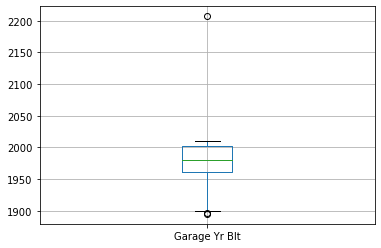

In [15]:
model.data_raw[['Garage Yr Blt']].boxplot()

#### Inspect data for pricing outliers. Using Overall Qual as a hue to help contextualize the plot

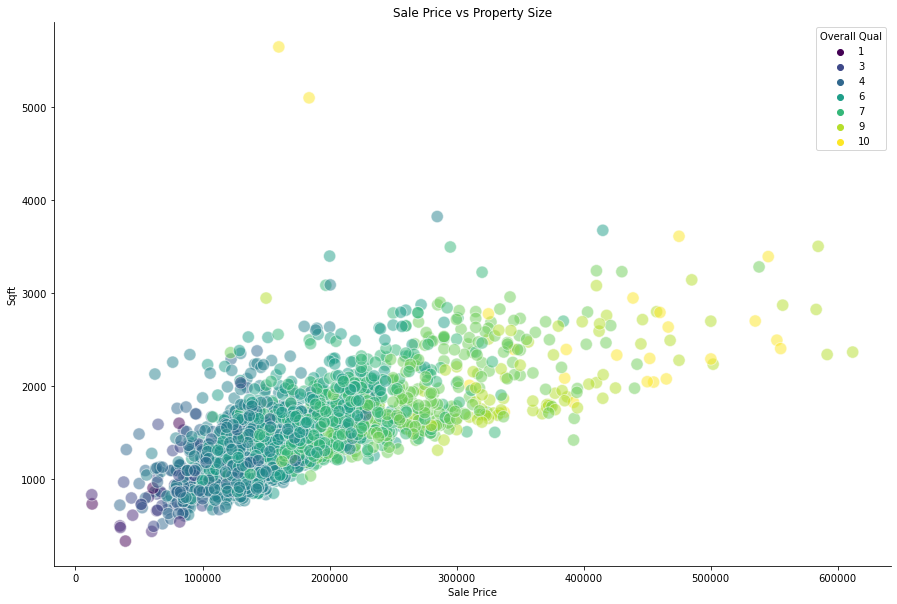

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=model.data_raw['SalePrice'], y=model.data_raw['Gr Liv Area'], hue=model.data_raw['Overall Qual'], palette='viridis', markers='^', s=150, alpha=.5)
plt.xlabel('Sale Price')
plt.ylabel('Sqft')
plt.title('Sale Price vs Property Size')
sns.despine()
plt.show()

#### It looks like we have a couple of large sqft property features, but the Sale Prices does not align. The two properties are likely outliers, but lets explore further. Will log their Id numbers to drop or impute their outlier data.

In [37]:
model.data_raw[model.data_raw['Gr Liv Area'] > 4500]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [38]:
model.data_raw[model.data_raw['Gr Liv Area'] > 4500][['Year Built', 'Neighborhood']]

,Year Built,Neighborhood
960,2008,Edwards
1885,2008,Edwards


#### It looks like we have a lot of properties in the neighborhood with Year Built ranging all over the place. Many new homes were built in the 2000s, but that matches the distribution of all our properties

<AxesSubplot:title={'center':'Edwards Neighborhood Year Built Dist'}>

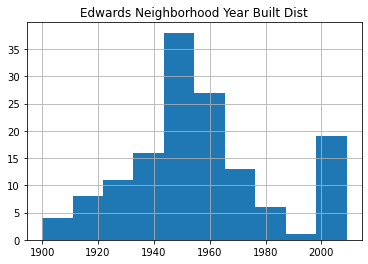

In [48]:
plt.title("Edwards Neighborhood 'Year Built' Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'Edwards']['Year Built'].hist()

<AxesSubplot:title={'center':"All Neighborhoods 'Year Built' Dist"}>

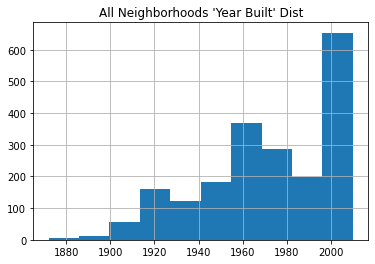

In [49]:
plt.title("All Neighborhoods 'Year Built' Dist")
model.data_raw['Year Built'].hist()

#### Lets look at the mean sale price for 'new homes' by neighborhood

In [51]:
model.data_raw[model.data_raw['Year Built'] > 2000].groupby(by=['Neighborhood']).mean()[['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
Neighborhood,,
Blmngtn,200417.681818,1433.454545
CollgCr,218669.540000,1585.680000
Crawfor,298280.571429,1666.285714
Edwards,168606.842105,1822.000000
Gilbert,197363.000000,1606.981132
Mitchel,205277.777778,1495.777778
NAmes,202000.000000,1449.500000
NoRidge,466500.000000,2633.000000
NridgHt,322831.352459,1944.795082


#### It looks like the sale price is likely accurate, but the square footage is off. Lets impute them as the mean of properties in the same neighborhood of the same age: 1,822sqft

#### Looks like we've cleaned any glaring outliers

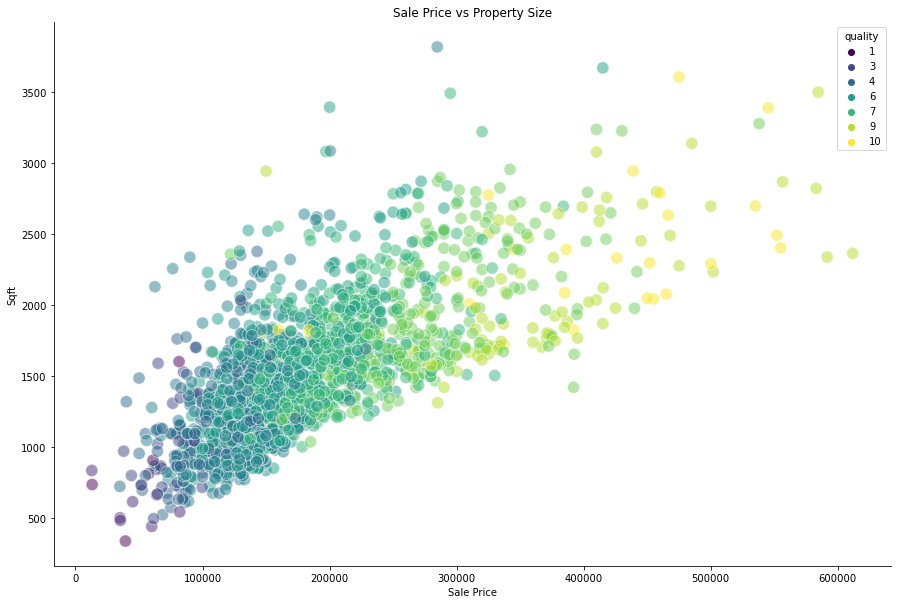

In [61]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=model.data['price'], y=model.data['gr_living_sqft'], hue=model.data['quality'], palette='viridis', markers='^', s=150, alpha=.5)
plt.xlabel('Sale Price')
plt.ylabel('Sqft')
plt.title('Sale Price vs Property Size')
sns.despine()
plt.show()

#### It looks like there might be some outliers at the low end too..

In [63]:
model.data_raw[model.data_raw['SalePrice'] < 20000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


##### Their overall quality metric is VERY low along with their square footage, so maybe the properties are actually priced correctly.

In [67]:
model.data_raw[model.data_raw['SalePrice'] < 20000][['Overall Qual', 'Neighborhood', 'Gr Liv Area']]

,Overall Qual,Neighborhood,Gr Liv Area
183,1,IDOTRR,733
1628,2,OldTown,832


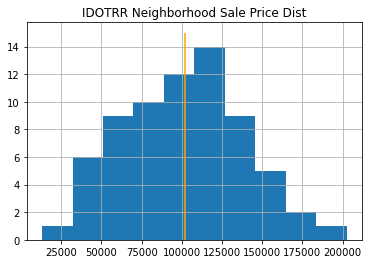

In [75]:
plt.title("IDOTRR Neighborhood Sale Price Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'IDOTRR']['SalePrice'].hist()
plt.vlines(x=model.data_raw[model.data_raw['Neighborhood'] == 'IDOTRR']['SalePrice'].median(), color='orange', ymin=0, ymax=15)

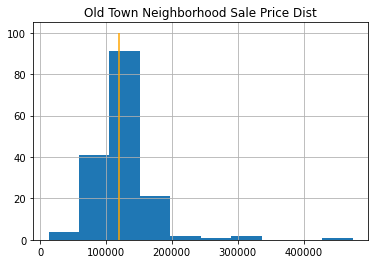

In [77]:
plt.title("Old Town Neighborhood Sale Price Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'OldTown']['SalePrice'].hist()
plt.vlines(x=model.data_raw[model.data_raw['Neighborhood'] == 'OldTown']['SalePrice'].median(), color='orange', ymin=0, ymax=100)

#### The sale price for both properties is ont he low end, but it does fall in line with their Quality score. The IDOTRR & OldTown neighborhoods do have a lower median Sale Price than the full data set.

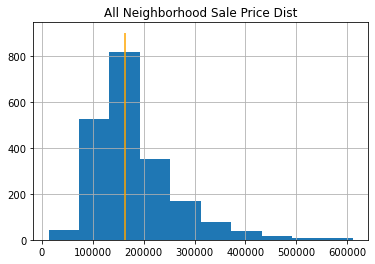

In [74]:
plt.title("All Neighborhood Sale Price Dist")
model.data_raw['SalePrice'].hist()
plt.vlines(x=model.data_raw['SalePrice'].median(), color='orange', ymin=0, ymax=900)

#### Feature Exploration

#### Explore categorical featurs using price per square foot.
#### Price per square foot is a better metric to measure the desirability of a property than 'Sale Price' because it adjusts for the size of a property.

#### Lets explore the affect on Sale Type. It is possible Sale Type (what type of contract was used to sell the proeprty) has some signal to Sale Price.

In [5]:
model.data[['sale_type', 'p_sqft']].groupby(['sale_type']).mean().sort_values(by=['p_sqft'])

,p_sqft
sale_type,
0,99.778025
1,106.054739
2,119.406576
3,122.552827
4,156.661376
5,167.093081


sale_type
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

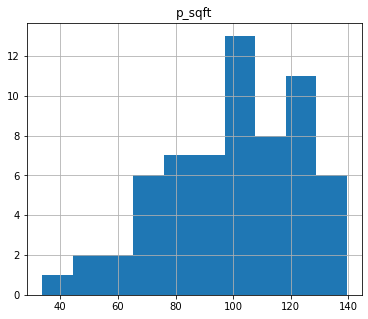

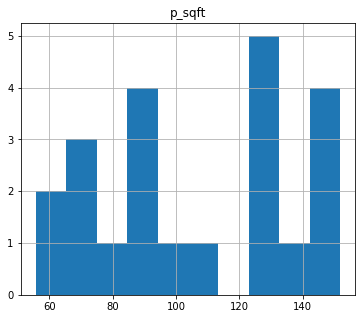

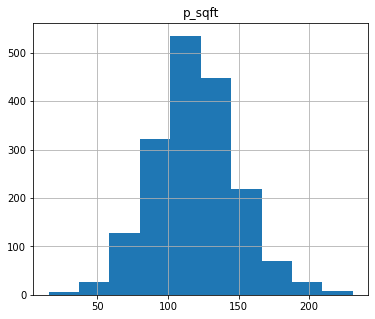

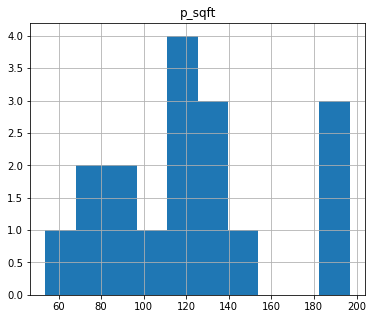

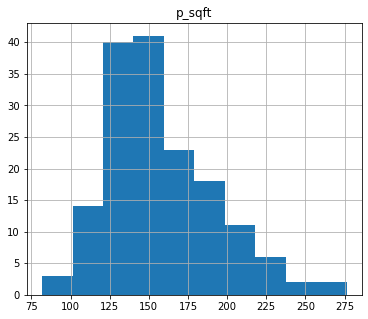

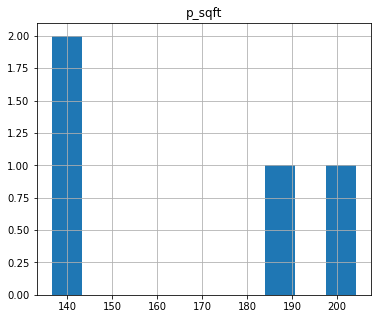

In [79]:
# Sale Type Labels 'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2
model.data[['sale_type', 'p_sqft']].groupby(['sale_type']).hist(column=['p_sqft'], figsize=(6, 5))

There is definitely some ordinal value to Sale Type, but it looks like a couple can be combined, as well. The data dictonary tells us they are very similar types of proeprty sale.

#### Rinse and repeat this process for many of the categorical variables. The goal is to determine if they are ordinal or nominal. For the sake of space, I will skit through to the end. Categories can be found in the ModelData class above.

#### Misc Features

In [81]:
model.data_raw['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [82]:
model.data_raw['Misc Feature'].isna().sum()

1986

##### 1986 NULL values in Misc Features and only 65 entries. Highly unlikely we see any signal from categorizing this data. Dropping it from the dataset. (Especially since the bulk of the entries are sheds, and typically dont drastically affect property value). Small sample size alone, should be enough.

#### Inverse situation is true here, but the result is the same. We have many data entries to look at, but they're essentially all the same. Not a lot of signal can be found here. Dropping. We have another roofing metric that will likely add more signal, so wont be losing much.

In [84]:
model.data_raw['Roof Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

#### Rinse and repeat for a few other categories. They're cleaned and dropped inside the ModelData class.

#### House style

House Style
1.5Fin    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1.5Unf    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1Story    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.5Fin    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.5Unf    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2Story    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SFoyer    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SLvl      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

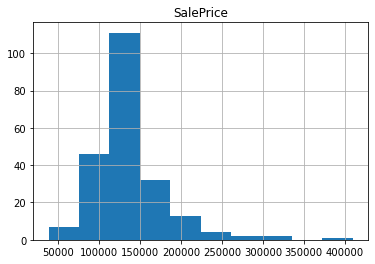

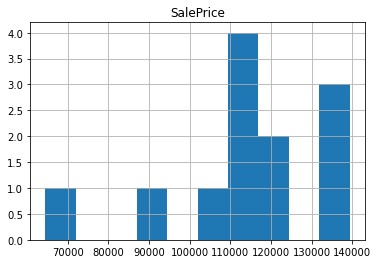

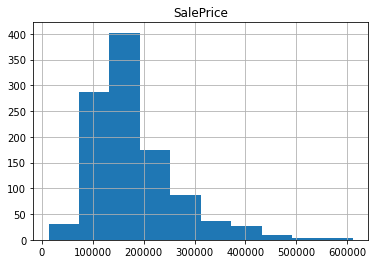

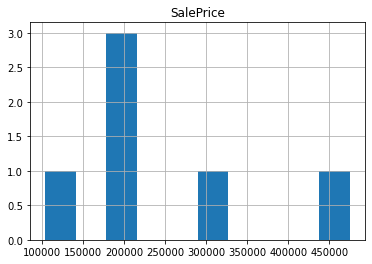

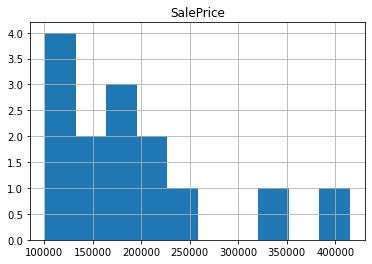

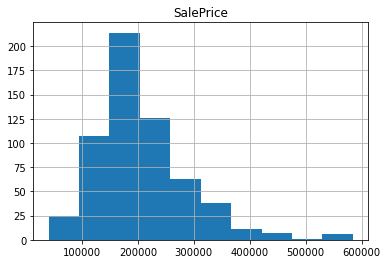

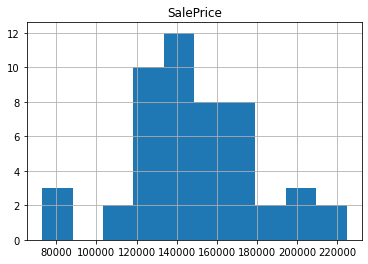

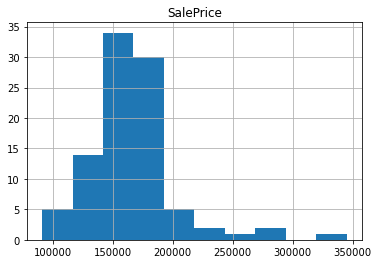

In [96]:
# {'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1}
model.data_raw[['House Style', 'SalePrice']].groupby(by=['House Style']).hist()

##### Decided to group split level and single story properties into one category and 2/2.5 story properties into another.. Was going back and forth between 2 and 3 categories, so I didn't 1/0 the data, instead kept as 1/2. The smaller sample size on the split level homes, despite having lower mean values was the ultimate deciding factor. Clear difference between 1 & 2 story properties. Not a massive difference, but figure it would be best to let normalization techniques sort out that difference.

In [ ]:
# {'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1}

In [97]:
model.data_raw.groupby(by=['House Style']).mean()['SalePrice'].sort_values()

House Style
1.5Unf    112466.666667
1.5Fin    136480.091743
SFoyer    149343.920000
SLvl      166248.989362
1Story    179809.194523
2.5Unf    191785.714286
2Story    206408.963211
2.5Fin    243666.666667
Name: SalePrice, dtype: float64

In [101]:
model.data.groupby(['style'])[['p_sqft', 'price']].mean()

,p_sqft,price
style,,
1,126.917579,170701.184927
2,109.755560,206439.417476


style
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

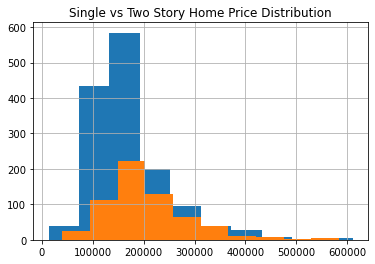

In [105]:
plt.title('Single vs Two Story Home Price Distribution')
model.data.groupby(['style'])['price'].hist()

style
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_sqft, dtype: object

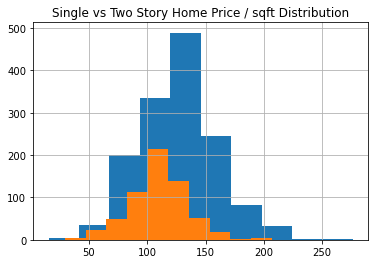

In [106]:
plt.title('Single vs Two Story Home Price / sqft Distribution')
model.data.groupby(['style'])['p_sqft'].hist()

----

#
#
### Correlation Exploration

#### Grab features with highest correlation to price

In [7]:
simple_feats = list(model.data.corr()[['price']].index[0:])
simple_feats.remove('price')        # target
simple_feats.remove('p_sqft')       # eda only
simple_feats.remove('price_log')    # target

In [8]:
simple_feats[0:20]

['id',
 'pid',
 'ms_subclass',
 'frontage',
 'lot_sqft',
 'street_material',
 'shape',
 'slope',
 'style',
 'quality',
 'condition',
 'year',
 'remod_year',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'basement_qual',
 'basement_cond',
 'basement_exposure']

In [11]:
plot_1 = model.data.corr()[['price']][0:20].sort_values(by='price', ascending=False)
plot_2 = model.data.corr()[['price']].sort_values(by='price', ascending=True)[:20]

<AxesSubplot:>

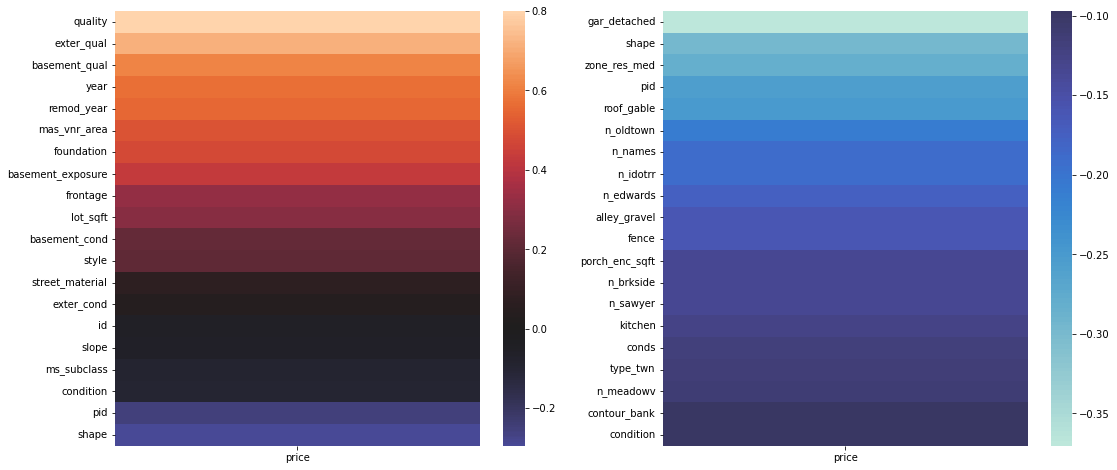

In [12]:
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(plot_1, center=0)

ax2 = plt.subplot(1, 2, 2)
sns.heatmap(plot_2, center=0)

#### Hold onto some negatively correlated features, but not categorical (yet)

In [107]:
neg_feats = list(model.data.corr()[['price']].sort_values(by='price', ascending=True).index[:20])
neg_feats

['gar_detached',
 'shape',
 'zone_res_med',
 'pid',
 'roof_gable',
 'n_oldtown',
 'n_names',
 'n_idotrr',
 'n_edwards',
 'alley_gravel',
 'fence',
 'porch_enc_sqft',
 'n_brkside',
 'n_sawyer',
 'kitchen',
 'conds',
 'type_twn',
 'n_meadowv',
 'contour_bank',
 'condition']

In [108]:
neg_feats = ['shape', 'fence', 'kitchen', 'conds', 'condition']

#### Grab the largest positively correlation features for feature exploration

In [13]:
test_cats = list(model.data.corr().sort_values(by=['price'], ascending=False)['price'][0:30].index)

In [14]:
test_cats.remove('price')       # target
test_cats.remove('price_log')   # target
test_cats.remove('p_sqft')      # eda only
test_cats.remove('n_nridght')   # categorical
len(test_cats)


26

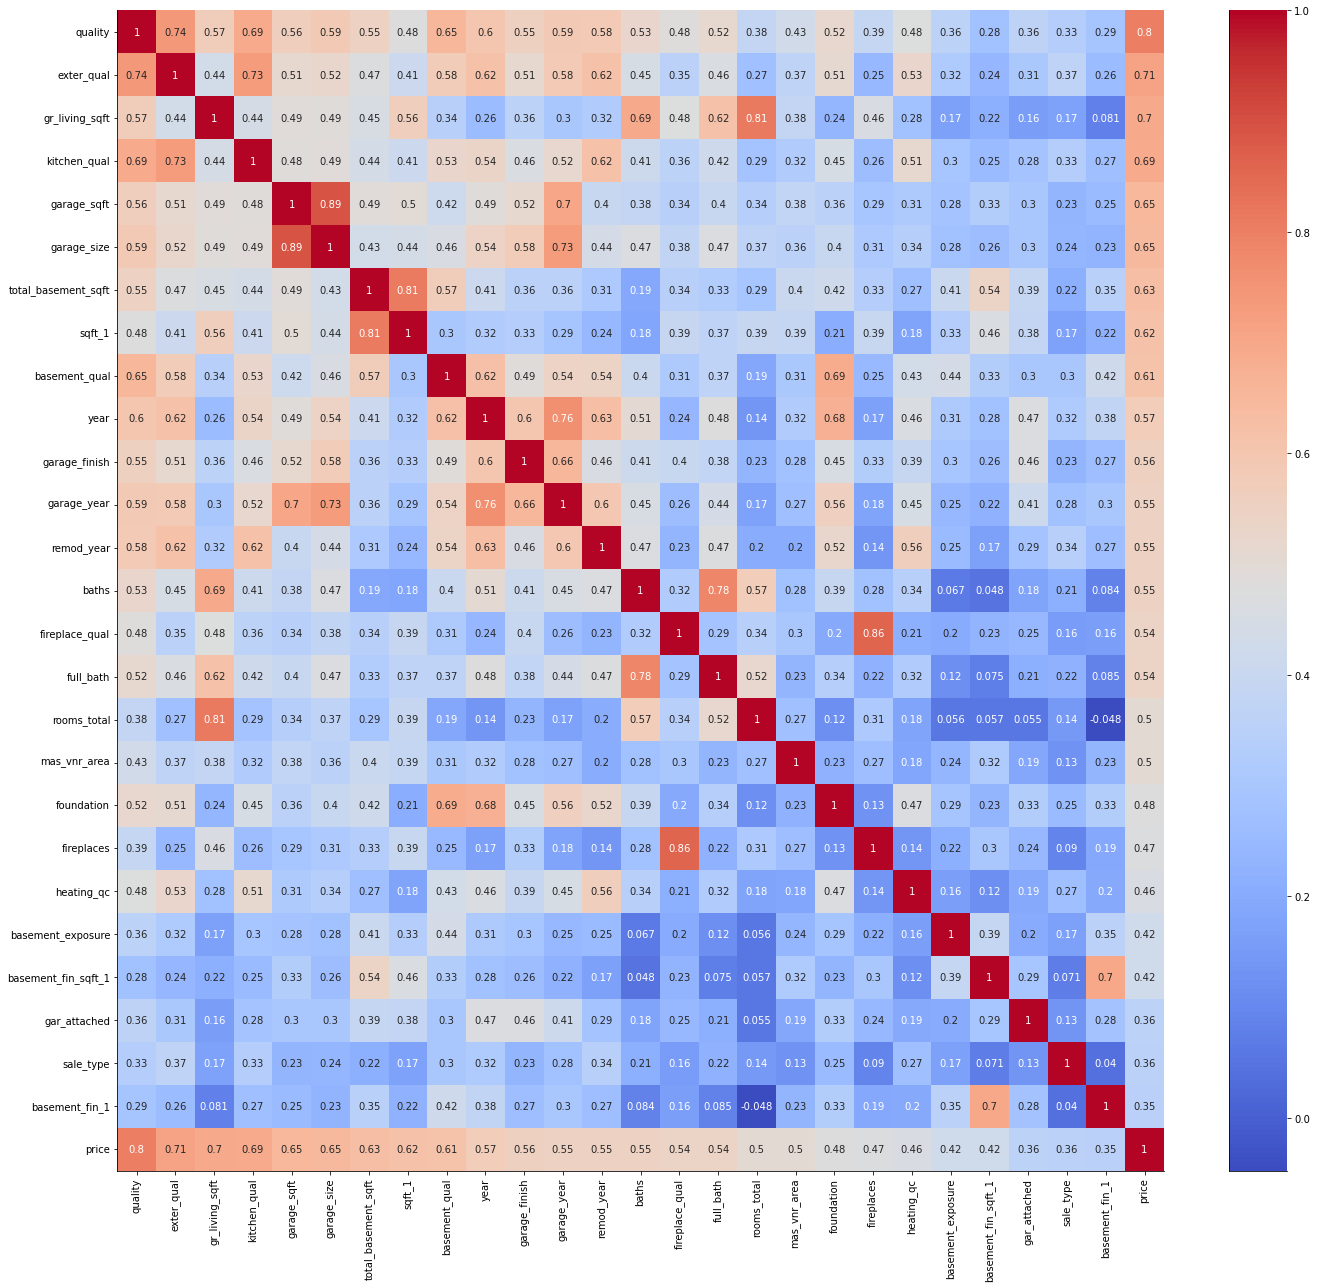

In [15]:
model.heatmap(test_cats + ['price'], figsize=(20,18))

#### Good to see some blue between our features. Ideally we will have positive correlation between to our price feature. However, since we're talking about features of a house, many of our features will have covariance.

#### Examine target

1.5575514385863427


<AxesSubplot:>

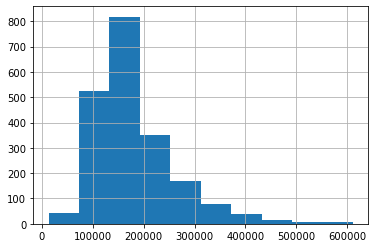

In [16]:
print(model.data['price'].skew())
model.data['price'].hist()

#### Sale price data is heavily right skewed

-0.14681576272177396


<AxesSubplot:>

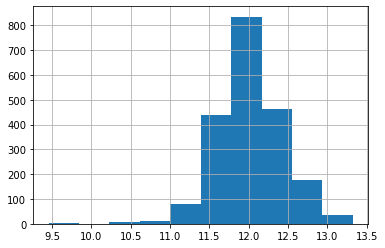

In [17]:
print(model.data['price_log'].skew())
model.data['price_log'].hist()

##### The log of final sale price is more normally distributed with a skew of only -0.14 compared to +1.56. Should see better results fitting data to the log price.
#
#

### Feature testing

##### Plan is to throw as many feature combindations against the wall and see which ones stick.

In [18]:
feats_1 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 'foundation', 'heating_qc', 'exter_qual']
feats_1_n = feats_1 + model.cats_neighborhood + model.cats_type

In [19]:
feats_2 = ['quality', 'gr_living_sqft', 'bed', 'baths', 'lot_sqft']
feats_2_cats = feats_2 + model.cats_neighborhood + model.cats_type + model.cats_zoning

In [20]:
feats_3 = ['quality', 'gr_living_sqft', 'lot_sqft', 'sale_type']
feats_3_cats = feats_3 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

In [21]:
feats_4 = ['gr_living_sqft', 'quality', 'condition', 'exter_qual', 'exter_cond', 'basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'garage_qual', 'garage_cond']
feats_4_cats = feats_4 + model.cats_neighborhood + model.cats_type

In [22]:
feats_5 = ['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'baths', 'rooms_total', 'lot_sqft']
feats_5_cats = feats_5 + model.cats_neighborhood + model.cats_type + model.cats_config

In [23]:
feats_6 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_6_cats = feats_6 + model.cats_neighborhood + model.cats_type

In [24]:
feats_7 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_7_cats = feats_7 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

#### Not seeing massive improvements in error scores as I tested the above combinations of features. Decided it was time to go to a more automated approach (while fast asleep in bed, this was going to take a while... Results exported to a tab sep txt file. (./datasets/feature_selection_results.txt))

#### Brute force feature selection

In [458]:
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]

# Functions borrowed from Geeks for Geeks

numbers = new_feats_12

ns = list(range(36, 39))

##### **Function source** (https://www.geeksforgeeks.org/python-program-to-get-all-subsets-of-given-size-of-a-set/)

In [17]:
# len(subsets_of_given_size(numbers, 24))

325

#### Iterate thru categorical variable batches

In [25]:
cat_combos = [
    model.cats_neighborhood + model.cats_type, 
    model.cats_neighborhood + model.cats_type + model.cats_garage, 
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_config,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning + model.cats_config]

#### Brute force feature selection (overnight)

In [462]:
# iterate thru length n feature subsets
for n in ns:

     # generate feature combinations of length n
     feats_combos = subsets_of_given_size(numbers, n)

     # iterate thru feature combinations
     for main_feats in feats_combos:

          # iterate thru combinations of categorical batches
          for feats in cat_combos:

               # combine features with categorical variables
               feats = feats + main_feats

               # split data into training & test sets
               X = model.data[feats]
               y = model.data['price_log']
               X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

               # select hyper parameters to test
               params_r = {'alpha':[250, 500, 1000, 2000]}
               params_l = {'alpha':[0.1, 0.02, 0.015]}

               # instatiate estimators
               ridge = Ridge(random_state=14)
               lr_poly = Lasso(max_iter=10_000, random_state=14)

               # instatiate transformers
               poly = PolynomialFeatures(degree=2, include_bias=False)
               ss = StandardScaler()

               # instatiate cross validation for hyper parameter tuning
               gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
               gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

               # generate polynomial feature combinations
               X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
               X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

               # scale data
               X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
               X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

               # train models
               gs_l.fit(X_train_scaled, y_train)
               gs_r.fit(X_train_scaled, y_train)

               # predict SalePrice
               y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
               y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

               # Score and log Lasso model predictions
               lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
               lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
               lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
               lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

               print(f'Lasso Best Est: {gs_l.best_estimator_}')
               print(f'Lasso Train R2: {lasso_train_r2}')
               print(f'Lasso Test R2: {lasso_test_r2}')
               print(f'Lasso Train RMSE: {lasso_train_rmse}')
               print(f'Lasso Test RMSE: {lasso_test_rmse}')

               # Score and log Ridge model predictions
               # R2
               ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
               ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
               # RMSE
               ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
               ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

               print(f'Ridge Best Est: {gs_r.best_estimator_}')
               print(f'Ridge Train R2: {ridge_train_r2}')
               print(f'Ridge Test R2: {ridge_test_r2}')
               print(f'Ridge Train RMSE: {ridge_train_rmse}')
               print(f'Ridge Test RMSE: {ridge_test_rmse}')
               
               # Log results and export to .csv for final feature selection
               # View results_new as tab separated text doc (best viewed in excel)
               results = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
                    'lasso_test_r2': lasso_test_r2,
                    'lasso_train_rmse': lasso_train_rmse,
                    'lasso_test_rmse': lasso_test_rmse,
                    'lasso_alpha': gs_l.best_params_['alpha'],
                    'ridge_train_r2': ridge_train_r2,
                    'ridge_test_r2': ridge_test_r2,
                    'ridge_train_rmse': ridge_train_rmse,
                    'ridge_test_rmse': ridge_test_rmse,
                    'ridge_alpha': gs_r.best_params_['alpha'],
                    'features':[feats]}, index=[0])
               
               # Export
               results.to_csv('./datasets/feature_selection_results.txt', sep='\t', mode='a', index=False, header=False)

# this step will take an exceptionally long time to run

#### Made the above into a function to quickly test feature combinations. Wanted to have it separate so I could make minor adjustments and tweaks while maintaining consistency for my batch testing. Results still append to the same location for storage and comparison.

In [26]:
def fit_models(feats, target, data=model.data):
     
     # split data into training & test sets
     X = data[feats]
     y = data[target]
     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

     # select hyper parameters to test
     params_r = {'alpha':[250, 500, 1000, 2000]}
     params_l = {'alpha':[0.1, 0.02, 0.015]}

     # instatiate estimators
     ridge = Ridge(random_state=14)
     lr_poly = Lasso(max_iter=10_000, random_state=14)

     # instatiate transformers
     poly = PolynomialFeatures(degree=2, include_bias=False)
     ss = StandardScaler()

     # instatiate cross validation for hyper parameter tuning
     gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
     gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

     # generate polynomial feature combinations
     X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
     X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

     # scale data
     X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
     X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

     # train models
     gs_l.fit(X_train_scaled, y_train)
     gs_r.fit(X_train_scaled, y_train)

     # predict SalePrice
     y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
     y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

     # Score and log Lasso model predictions
     lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
     lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
     lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
     lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

     print(f'Lasso Best Est: {gs_l.best_estimator_}')
     print(f'Lasso Train R2: {lasso_train_r2}')
     print(f'Lasso Test R2: {lasso_test_r2}')
     print(f'Lasso Train RMSE: {lasso_train_rmse}')
     print(f'Lasso Test RMSE: {lasso_test_rmse}')

     # Score and log Ridge model predictions
     # R2
     ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
     ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
     # RMSE
     ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
     ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

     print(f'Ridge Best Est: {gs_r.best_estimator_}')
     print(f'Ridge Train R2: {ridge_train_r2}')
     print(f'Ridge Test R2: {ridge_test_r2}')
     print(f'Ridge Train RMSE: {ridge_train_rmse}')
     print(f'Ridge Test RMSE: {ridge_test_rmse}')
     
     # Log results and export to .csv for final feature selection
     # View results_new as tab separated text doc (best viewed in excel)
     results = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
          'lasso_test_r2': lasso_test_r2,
          'lasso_train_rmse': lasso_train_rmse,
          'lasso_test_rmse': lasso_test_rmse,
          'lasso_alpha': gs_l.best_params_['alpha'],
          'ridge_train_r2': ridge_train_r2,
          'ridge_test_r2': ridge_test_r2,
          'ridge_train_rmse': ridge_train_rmse,
          'ridge_test_rmse': ridge_test_rmse,
          'ridge_alpha': gs_r.best_params_['alpha'],
          'features':[feats]}, index=[0])
     
     # Export
     results.to_csv('./datasets/feature_selection_results.txt', sep='\t', mode='a', index=False, header=False)

#### Feature selection gathered from datasets folder in feature_selection_results.txt 

In [27]:
target = 'price_log'
good_feats = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 'basement_fin_1']

In [28]:
new_feats = good_feats + neg_feats

In [29]:
fit_models(new_feats, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8938591188986935
Lasso Test R2: 0.8704310759384054
Lasso Train RMSE: 24413.0
Lasso Test RMSE: 23985.0
Ridge Best Est: Ridge(alpha=250, random_state=14)
Ridge Train R2: 0.9464713906872874
Ridge Test R2: 0.8879899646274281
Ridge Train RMSE: 16112.0
Ridge Test RMSE: 20784.0


#### Train features on all the training data

#### used to test feature options on both ridge and lasso models. I assumed lasso would be more effective than ridge, given the number of poly features that were used, but the error scores proved to be lower, consistently, for ridge. Decided to leave the lasso model commented out, but the best models were built from ridge.

In [403]:

X_train = model.data[new_feats_11]
y_train = model.data['price_log']

params_r = {'alpha':[250, 500, 1000, 1500]}
params_l = {'alpha':[0.1, 0.02, 0.0175, 0.03]}

ridge = Ridge(random_state=14)
# lr_poly = Lasso(max_iter=10_000, random_state=14)

poly = PolynomialFeatures(degree=2, include_bias=False)
ss = StandardScaler()

gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
# gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

# transform data
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)

# gs_l.fit(X_train_scaled, y_train)
gs_r.fit(X_train_scaled, y_train)


# Lasso
# lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
# lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)

# print(f'Lasso Best Est: {gs_l.best_estimator_}')
# print(f'Lasso Train R2: {lasso_train_r2}')
# print(f'Lasso Train RMSE: {lasso_train_rmse}')

# Ridge
ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)

print(f'Ridge Best Est: {gs_r.best_estimator_}')
print(f'Ridge Train R2: {ridge_train_r2}')
print(f'Ridge Train RMSE: {ridge_train_rmse}')

Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9457025101010403
Ridge Train RMSE: 15478.0


In [28]:
# model = ModelData()
# model.train_test(X=good_feats, y='price_log')
# model.run_lasso(scale=True, poly=False, a=.1)

n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0
type_twn               0
type_sf                0
type_twn_end           0
gar_attached           0
gar_detached           0
gar_builtin            0
gar_basement           0
gar_2types             0
gar_carport            0
quality                0
gr_living_sqft         0
kitchen_qual           0
garage_sqft            0


In [740]:
pd.DataFrame(zip(model.lasso.feature_names_in_, model.lasso.coef_))

,0,1
0,quality,28573.495988
1,gr_living_sqft,20784.094761
2,bed,-1587.172099
3,baths,4510.985138
4,lot_sqft,2284.719033
5,n_grnhill,0.000000
6,n_greens,950.927583
7,n_blueste,-0.000000
8,n_npkvill,161.138979
9,n_veenker,-1242.461048


##### Explore Year data. An interesting trend started in the 1990's and increased significantly in the early 2000's. Housing production went WAY up all across the United States. As a result, we have many more new homes of a 'high'* quality. Will explore modeling home values segmented by pre and post 1990.

##### The 'Foreclosure Crisis' is presumed to have officially begun in 2007 and was at its worst in 2010. We will also explore the change in price between 2007 & 2010

##### * Housing 'quality' metric on average is high, but the construction quality has since been suggested by many to be of a lower overall quality.

<AxesSubplot:xlabel='year', ylabel='price'>

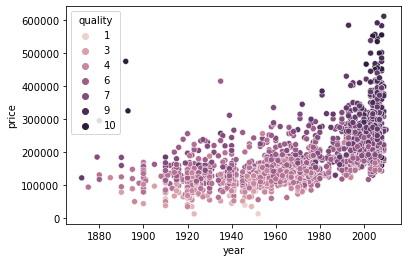

In [30]:
# Price vs Year property was built
sns.scatterplot(x=model.data['year'], y=model.data['price'], hue=model.data['quality'])

In [31]:
model.data['modern'] = model.data['year'].apply(lambda x: 1 if x > 2000 else 0)

In [32]:
new_feats_2 = new_feats + model.cats_contour
fit_models(new_feats, target)
print('=' * 50)
fit_models(new_feats_2, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8938591188986935
Lasso Test R2: 0.8704310759384054
Lasso Train RMSE: 24413.0
Lasso Test RMSE: 23985.0
Ridge Best Est: Ridge(alpha=250, random_state=14)
Ridge Train R2: 0.9464713906872874
Ridge Test R2: 0.8879899646274281
Ridge Train RMSE: 16112.0
Ridge Test RMSE: 20784.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768440539588
Lasso Test R2: 0.8729646940667564
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=250, random_state=14)
Ridge Train R2: 0.949881360842544
Ridge Test R2: 0.8892635651797666
Ridge Train RMSE: 15444.0
Ridge Test RMSE: 20270.0


##### Adding lot contour has incrased our RMSE by $500

In [33]:
new_feats_3 = new_feats_2 + model.cats_alley
fit_models(new_feats_2, target)
print('=' * 50)
fit_models(new_feats_3, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768440539588
Lasso Test R2: 0.8729646940667564
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=250, random_state=14)
Ridge Train R2: 0.949881360842544
Ridge Test R2: 0.8892635651797666
Ridge Train RMSE: 15444.0
Ridge Test RMSE: 20270.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449117545
Lasso Test R2: 0.8729647002471282
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9440779255661453
Ridge Test R2: 0.8915466000130189
Ridge Train RMSE: 16345.0
Ridge Test RMSE: 20082.0


##### Adding the alley category has reduced our RMSE by an another $200

In [130]:
new_feats_4 = new_feats_3 + model.cats_zoning
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_4, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449117545
Lasso Test R2: 0.8729647002471282
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9440779255661453
Ridge Test R2: 0.8915466000130189
Ridge Train RMSE: 16345.0
Ridge Test RMSE: 20082.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8983971242340695
Lasso Test R2: 0.8749607067809752
Lasso Train RMSE: 23541.0
Lasso Test RMSE: 23036.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9472597990982384
Ridge Test R2: 0.8928503607909334
Ridge Train RMSE: 16111.0
Ridge Test RMSE: 20268.0


#### No improvement adding zoning

In [138]:
new_feats_5 = new_feats_3 + model.cats_siding
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_5, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449117545
Lasso Test R2: 0.8729647002471282
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9440779255661453
Ridge Test R2: 0.8915466000130189
Ridge Train RMSE: 16345.0
Ridge Test RMSE: 20082.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449232513
Lasso Test R2: 0.8729646990250066
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9460406817808773
Ridge Test R2: 0.8901488573626167
Ridge Train RMSE: 15760.0
Ridge Test RMSE: 20455.0


#### no improvment from adding siding

In [139]:
new_feats_6 = new_feats_3 + model.cats_roof
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_6, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449117545
Lasso Test R2: 0.8729647002471282
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9440779255661453
Ridge Test R2: 0.8915466000130189
Ridge Train RMSE: 16345.0
Ridge Test RMSE: 20082.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768413597768
Lasso Test R2: 0.8729646920453401
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.946123986357178
Ridge Test R2: 0.8891013998631098
Ridge Train RMSE: 16006.0
Ridge Test RMSE: 20312.0


#### No improvement adding roof category

In [34]:
new_feats_7 = new_feats_3 + ['street_material', 'low_qual_sqft']
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_7, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8976768449117545
Lasso Test R2: 0.8729647002471282
Lasso Train RMSE: 23510.0
Lasso Test RMSE: 23166.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9440779255661453
Ridge Test R2: 0.8915466000130189
Ridge Train RMSE: 16345.0
Ridge Test RMSE: 20082.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8984472318160099
Lasso Test R2: 0.8729331830555078
Lasso Train RMSE: 23517.0
Lasso Test RMSE: 23143.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9452269408340604
Ridge Test R2: 0.8912440792151107
Ridge Train RMSE: 16258.0
Ridge Test RMSE: 20121.0


In [35]:
new_feats_8 = new_feats_7 + ['lot_sqft']
fit_models(new_feats_7, target)
print('=' * 50)
fit_models(new_feats_8, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8984472318160099
Lasso Test R2: 0.8729331830555078
Lasso Train RMSE: 23517.0
Lasso Test RMSE: 23143.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9452269408340604
Ridge Test R2: 0.8912440792151107
Ridge Train RMSE: 16258.0
Ridge Test RMSE: 20121.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9012358938896183
Lasso Test R2: 0.8755942399432707
Lasso Train RMSE: 22972.0
Lasso Test RMSE: 23139.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9476262018136405
Ridge Test R2: 0.8931204707978471
Ridge Train RMSE: 15759.0
Ridge Test RMSE: 19853.0


#### Lot sqft reduced our error by another $200

In [36]:
new_feats_9 = new_feats_8 + ['electrical']
fit_models(new_feats_8, target)
print('=' * 50)
fit_models(new_feats_9, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9012358938896183
Lasso Test R2: 0.8755942399432707
Lasso Train RMSE: 22972.0
Lasso Test RMSE: 23139.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9476262018136405
Ridge Test R2: 0.8931204707978471
Ridge Train RMSE: 15759.0
Ridge Test RMSE: 19853.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9011684037270413
Lasso Test R2: 0.8753645665616285
Lasso Train RMSE: 22982.0
Lasso Test RMSE: 23100.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9478953574035793
Ridge Test R2: 0.8929987935398433
Ridge Train RMSE: 15748.0
Ridge Test RMSE: 19818.0


#### Small improvement from adding electrical.. will continue to test

In [37]:
new_feats_10 = new_feats_9 + ['heating', 'basement_fin_2']
fit_models(new_feats_9, target)
print('=' * 50)
fit_models(new_feats_10, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9011684037270413
Lasso Test R2: 0.8753645665616285
Lasso Train RMSE: 22982.0
Lasso Test RMSE: 23100.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9478953574035793
Ridge Test R2: 0.8929987935398433
Ridge Train RMSE: 15748.0
Ridge Test RMSE: 19818.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9022512014607705
Lasso Test R2: 0.873288846305635
Lasso Train RMSE: 22950.0
Lasso Test RMSE: 23078.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9501245026129368
Ridge Test R2: 0.8917221386786706
Ridge Train RMSE: 15485.0
Ridge Test RMSE: 19707.0


#### heating and partial finished basement sqft reduced our error by $100

In [190]:
set(model.data.columns).difference(set(new_feats_10 + model.cats_zoning + model.cats_siding + model.cats_roof +
                                       model.cats_config + ['ac', 'basement_bath', 'basement_cond', 'slope', 
                                       'misc_sqft', 'pid', 'id', 'bed', 'price', 'price_log', 'p_sqft', 'pool_sqft',
                                       'rooms_total', 'sqft_2', 'ms_subclass', 'frontage', 'pool_qc', 'porch_enc_sqft',
                                       'style', ]))

{'basement_fin_sqft_2',
 'basement_half_bath',
 'basement_unfin_sqft',
 'deck_wood_sqft',
 'exter_cond',
 'exter_qual',
 'functional',
 'garage_cond',
 'garage_qual',
 'half_bath',
 'low_qual_sqft',
 'paved_drive',
 'pool_qc',
 'porch_3_ssn',
 'porch_enc_sqft',
 'porch_screened',
 'porch_sqft',
 'sold_month',
 'sold_year',
 'sold_year_mo',
 'style'}

In [38]:
new_feats_11 = new_feats_10 + ['sold_year_mo', 'basement_fin_sqft_2']
fit_models(new_feats_10, target)
print('=' * 50)
fit_models(new_feats_11, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9022512014607705
Lasso Test R2: 0.873288846305635
Lasso Train RMSE: 22950.0
Lasso Test RMSE: 23078.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9501245026129368
Ridge Test R2: 0.8917221386786706
Ridge Train RMSE: 15485.0
Ridge Test RMSE: 19707.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9022512014609771
Lasso Test R2: 0.8732888463060526
Lasso Train RMSE: 22950.0
Lasso Test RMSE: 23078.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9511440052050256
Ridge Test R2: 0.8932715959487092
Ridge Train RMSE: 15335.0
Ridge Test RMSE: 19521.0


#### A healthy improvement in our RMSE with the addition of when the property was sold and basement finished sqft. Basement condition is clearly very important to the people of Ames

In [451]:
# re-run thru brute force
new_feats_12 = list(set(new_feats_11).difference(set(model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning + model.cats_config)))

----

#### Visualization of Reults

In [678]:
def single_pred(data, features=new_feats_11):
    # currently using new_feats_11
    data = data[features]
    data_poly = pd.DataFrame(poly.transform(data), columns=poly.get_feature_names_out(), index=data.index)
    data_scaled = pd.DataFrame(ss.transform(data_poly), columns=data_poly.columns, index=data.index)

    return np.exp(gs_r.predict(data_scaled))

In [679]:
y_predictions = single_pred(model.data)
y_truth = model.data['price']

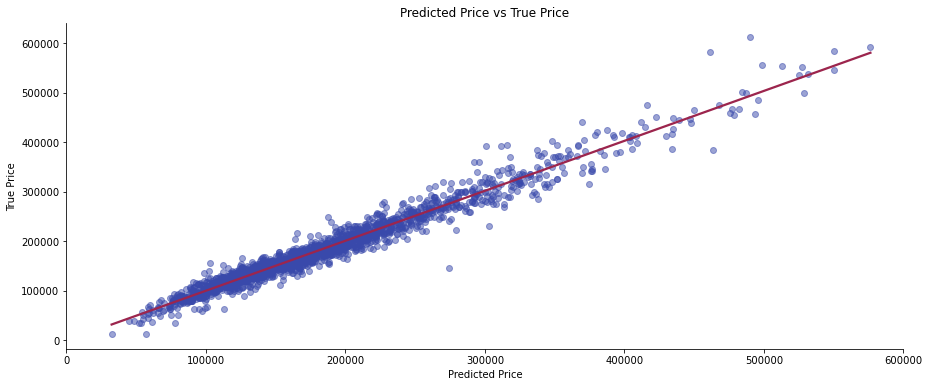

In [803]:
plt.figure(figsize=(15, 6))
sns.regplot(x=y_predictions, y=y_truth, ci=None, scatter_kws={'alpha':0.5}, color='#3949ab', line_kws={'color': '#9c254d'})

plt.xlim(0, 600000)

plt.title("Predicted Price vs True Price")
plt.xlabel('Predicted Price')
plt.ylabel('True Price')
sns.despine();

<AxesSubplot:xlabel='year', ylabel='price'>

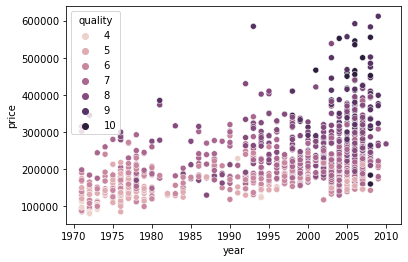

In [106]:
# Price vs Year property was built
sns.scatterplot(x=model.data['year'][model.data['year'] > 1970], y=model.data['price'][model.data['year'] > 1970], hue=model.data['quality'][model.data['year'] > 1970])

Make new model for houses built in 2000s

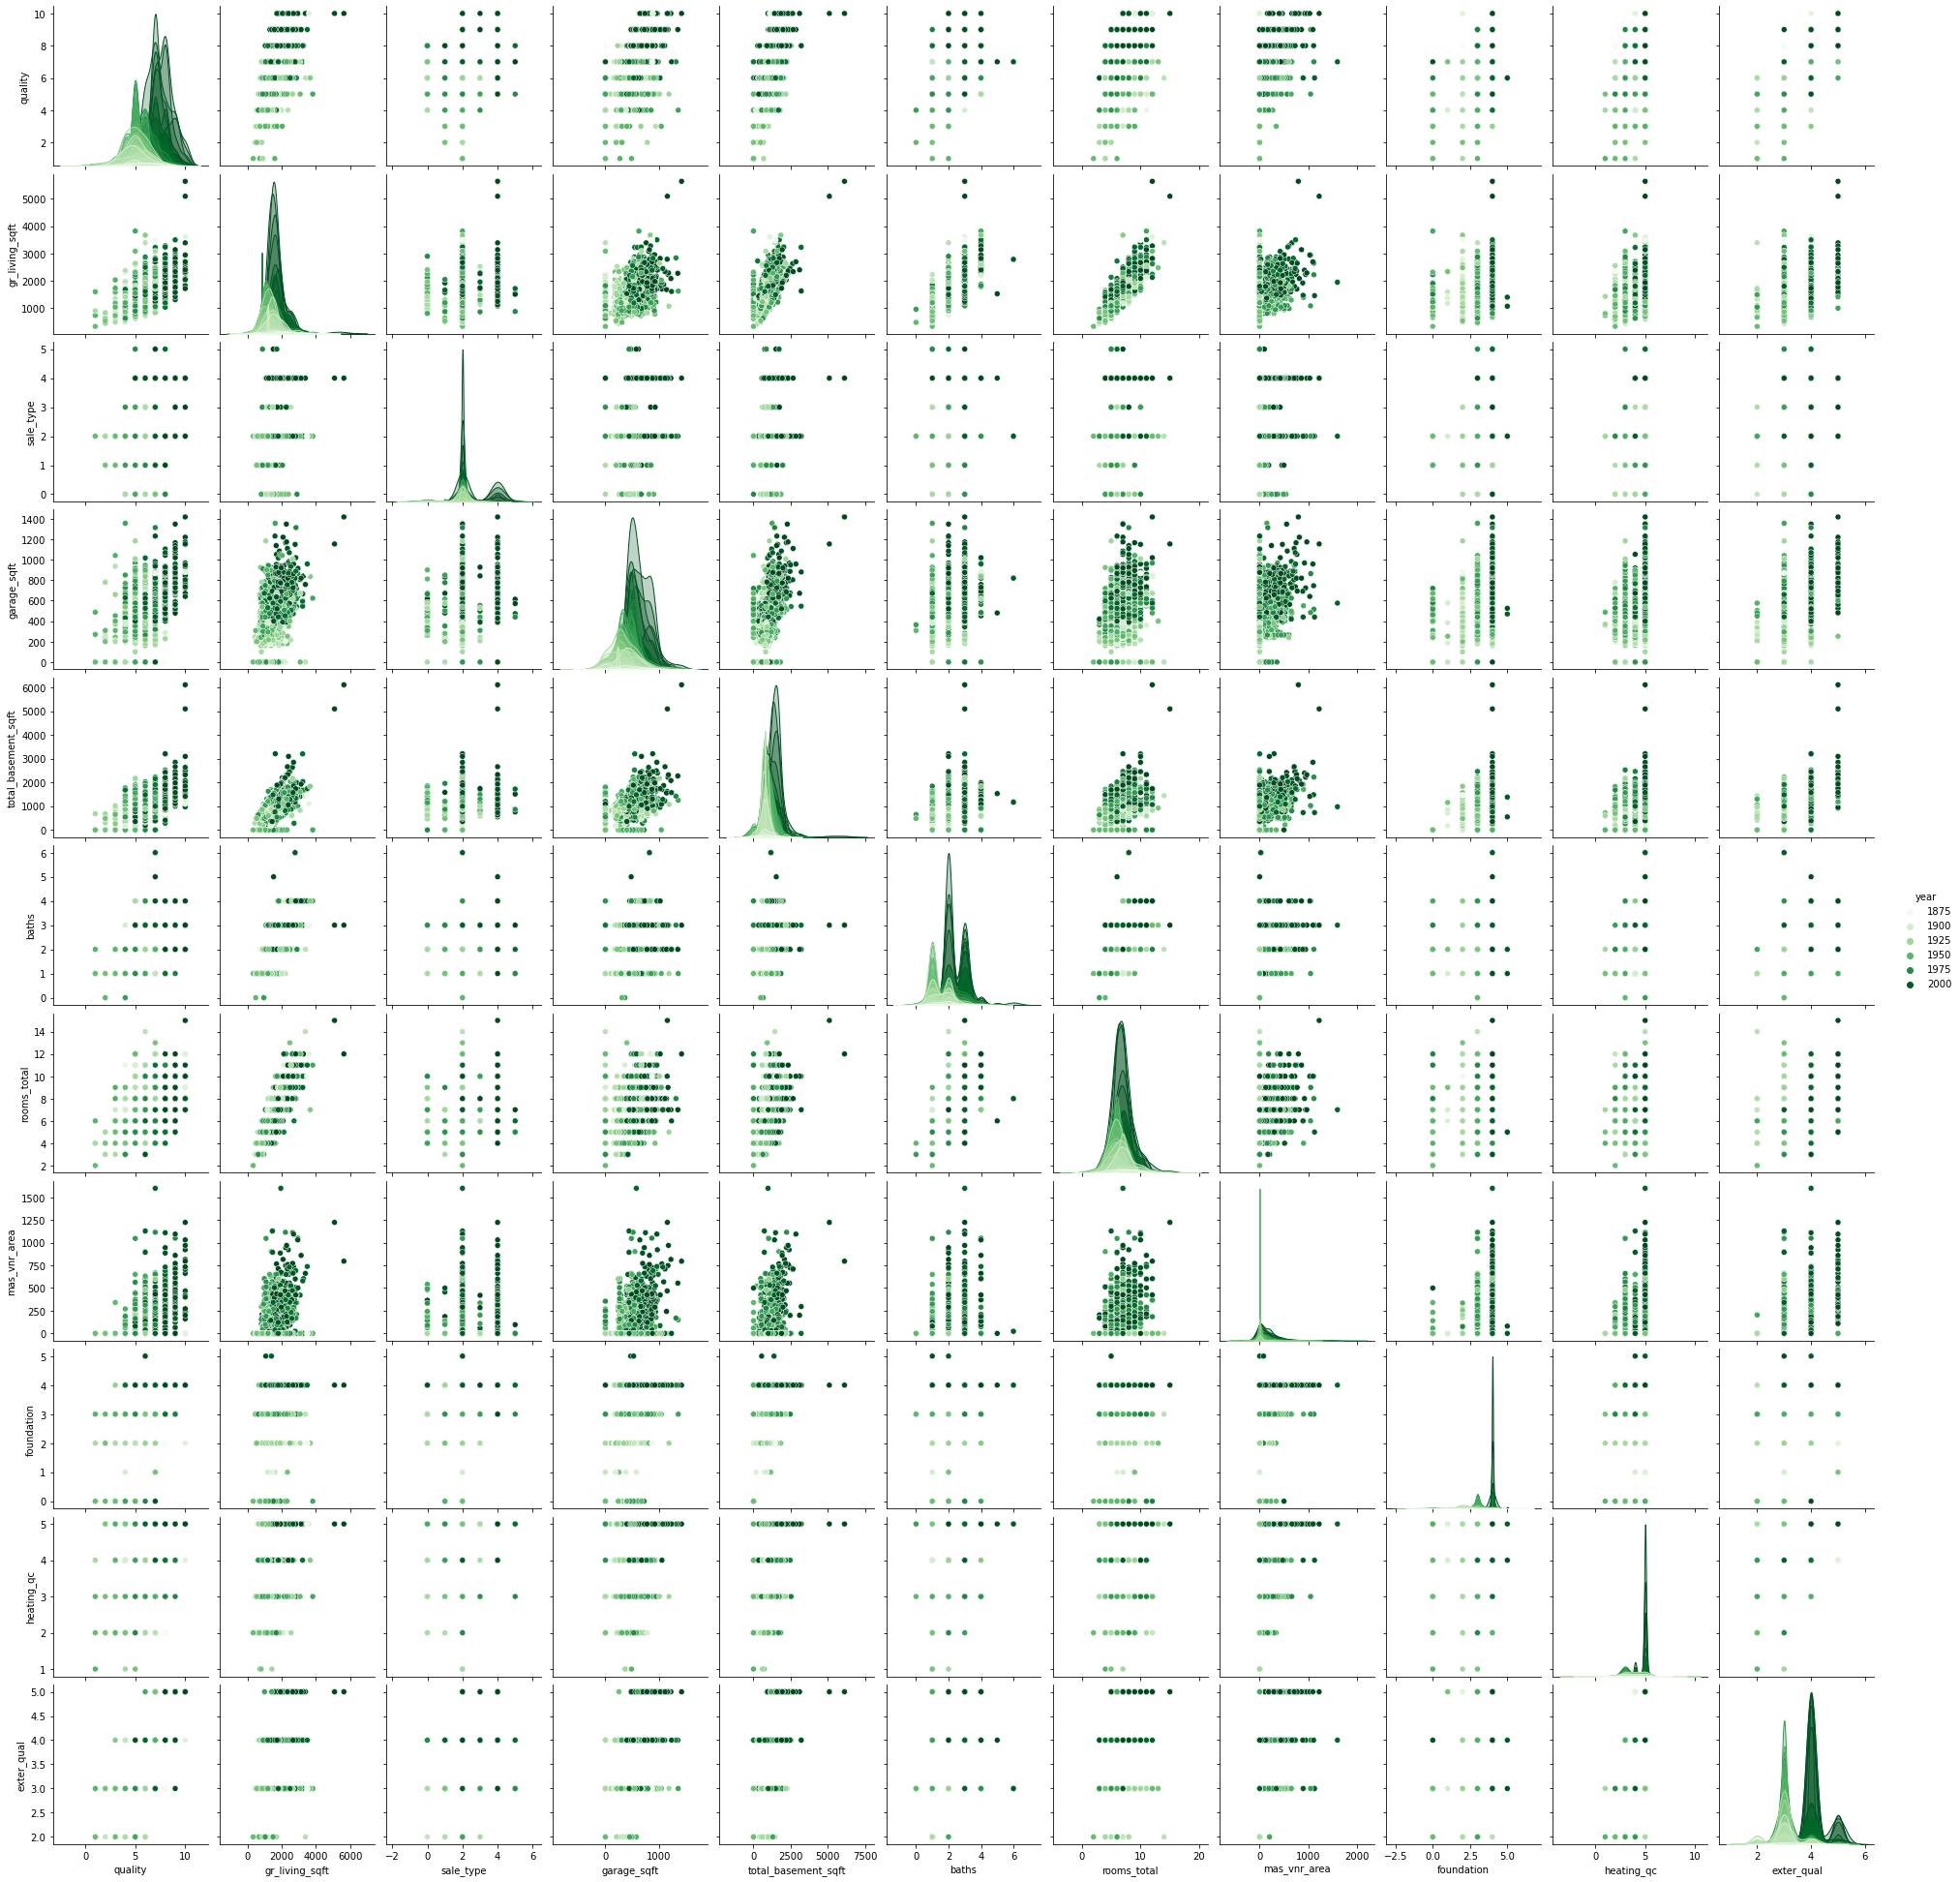

In [45]:
sns.pairplot(model.data[feats_1], hue='year', palette='Greens');

### Submit scores

In [44]:
def predict_testing(predictors, estimator):

    # select predictive columns
    X = model.testing_data[predictors].copy()
    # hold testing id numbers
    X_id = model.testing_data['id'].copy()
    X_id.rename({'id': 'Id'}, axis=1, inplace=True)

    # generate polynomial features (uses the transformers from the model training process above)
    X = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names_out(), index=X.index)
    # scale data (uses the transformers from the model training process above)
    X = pd.DataFrame(ss.transform(X), columns=X.columns, index=X.index)

    # generate predictions
    y_preds = pd.DataFrame(np.exp(estimator.predict(X)), columns=['SalePrice'], index=X.index)
    # merge predictions with id numbers
    y_preds = pd.concat([X_id, y_preds], axis=1)
    
    # export to .csv for submission
    y_preds.to_csv('./submissions/ridge_submit.csv', index=False)



### Export for submission

In [202]:
predict_testing(new_feats_11, gs_r)

#
### Presentation

In [875]:
fixers = model.data[model.data['quality'] < 5].copy()

In [876]:
# neighb_weights = pd.DataFrame(zip(poly.get_feature_names_out(), gs_r.best_estimator_.coef_,)).iloc[0:26,:]
# neighb_weights.columns=['neighborhood', 'desirability']
# neighb_weights.set_index('neighborhood', inplace=True)
# neighb_weights['desirability'] = round(neighb_weights['desirability'] * 10000, 1)
# neighb_weights.sort_values(by=['desirability'])

In [877]:
model.data_raw['PriceSqft'] = model.data_raw['SalePrice'] / model.data_raw['Gr Liv Area']

In [878]:
fixers = pd.merge(left=fixers, right=model.data_raw[['Id', 'Neighborhood']].rename({'Id':'id'}, axis=1), how='left', left_on='id', right_on='id')
fixers.columns = fixers.columns.str.lower()

In [879]:
fixers

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,modern,neighborhood
0,912,909250220,50,65.0,7804,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.813030,68.147400,2010.00,2,0,SWISU
1,330,923226250,160,21.0,1476,1,3,2,2,4,...,0.0,0.0,0.0,0.0,11.238489,69.597070,2010.25,2,0,MeadowV
2,1350,903235100,30,60.0,6324,1,2,2,1,4,...,0.0,0.0,0.0,0.0,11.134589,131.730769,2008.42,1,0,BrkSide
3,402,527425110,20,60.0,9000,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.775290,150.462963,2009.58,1,0,NAmes
4,2084,905476170,30,58.0,9098,1,2,2,1,4,...,0.0,0.0,0.0,0.0,11.362103,142.148760,2007.58,1,0,Edwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2862,909279040,30,80.0,11600,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.831379,116.525424,2006.58,1,0,Crawfor
197,2288,923228220,160,21.0,1495,1,3,2,2,4,...,0.0,0.0,1.0,0.0,11.449986,85.989011,2007.42,2,0,MeadowV
198,2842,909101080,50,45.0,8248,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.326596,58.698727,2006.75,1,0,Edwards
199,785,905377130,30,70.0,12342,1,2,2,1,4,...,0.0,0.0,0.0,0.0,11.320554,95.818815,2009.25,1,0,Edwards


In [880]:
best_neighbs = model.data_raw.groupby(['Neighborhood'])['PriceSqft'].mean().sort_values()[-12:]

In [888]:
fixer_index = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo']).index

In [889]:
fixers = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])

In [890]:
fixers

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,modern,neighborhood
60,2904,923125030,20,125.0,31250,1,3,2,1,1,...,0.0,0.0,0.0,0.0,11.308358,50.937500,2006.42,2,0,Mitchel
31,2283,923205025,190,64.0,32463,1,3,1,1,4,...,0.0,0.0,0.0,1.0,12.031719,103.575832,2007.25,1,0,Mitchel
90,2300,923252080,20,69.0,7599,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.771436,153.254438,2007.50,1,0,Mitchel
181,2279,923202220,20,200.0,43500,1,3,2,1,3,...,0.0,0.0,0.0,0.0,11.775290,63.913471,2007.50,1,0,Mitchel
101,2127,907135180,20,60.0,8070,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.724806,124.848485,2007.67,1,0,CollgCr
103,2144,907227100,20,60.0,7200,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.669929,133.714286,2007.83,1,0,CollgCr
104,1403,905401060,20,70.0,53227,1,2,1,1,4,...,0.0,0.0,0.0,0.0,12.452933,153.938665,2008.25,1,0,ClearCr
94,1375,904101170,50,80.0,17120,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.808814,84.654912,2008.58,2,0,ClearCr
183,1570,914476450,20,74.0,9990,1,3,2,1,4,...,0.0,0.0,0.0,0.0,12.339291,135.287152,2008.58,2,0,Mitchel
184,1593,923204040,85,150.0,14137,1,3,2,1,4,...,0.0,0.0,1.0,0.0,12.061047,144.166667,2008.92,1,0,Mitchel


In [891]:
fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['neighborhood']

60     Mitchel
31     Mitchel
90     Mitchel
181    Mitchel
101    CollgCr
103    CollgCr
104    ClearCr
94     ClearCr
183    Mitchel
184    Mitchel
52     ClearCr
Name: neighborhood, dtype: object

<AxesSubplot:xlabel='sold_year_mo', ylabel='price'>

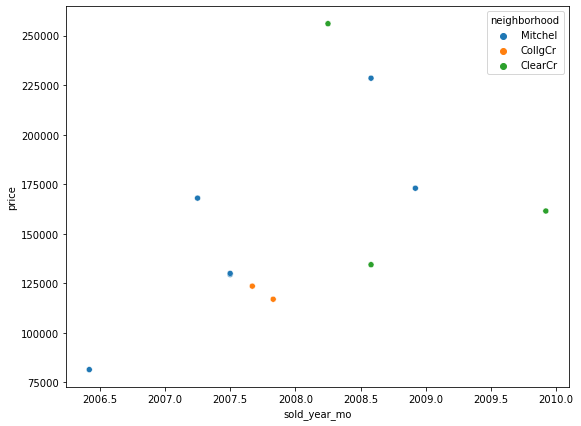

In [892]:
plt.figure(figsize=((9, 7)))
sns.scatterplot(x=fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['sold_year_mo'], 
                y = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['price'], 
                hue=fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['neighborhood'])


In [895]:
fixers[['price', 'gr_living_sqft', 'bed', 'baths', 'neighborhood', 'basement_fin_1', 'total_basement_sqft']]

,price,gr_living_sqft,bed,baths,neighborhood,basement_fin_1,total_basement_sqft
60,81500,1600,3,2,Mitchel,0,0.0
31,168000,1622,3,1,Mitchel,4,1249.0
90,129500,845,2,1,Mitchel,5,845.0
181,130000,2034,2,1,Mitchel,0,0.0
101,123600,990,3,1,CollgCr,6,990.0
103,117000,875,3,1,CollgCr,3,385.0
104,256000,1663,2,1,ClearCr,4,1364.0
94,134432,1588,4,2,ClearCr,0,0.0
183,228500,1689,3,2,Mitchel,5,1680.0
184,173000,1200,3,1,Mitchel,5,1200.0


In [896]:
renovated = fixers.loc[fixer_index].copy()

In [897]:
renovated[new_feats_11].iloc[:,35:55]

,gar_carport,quality,gr_living_sqft,kitchen_qual,garage_sqft,garage_size,total_basement_sqft,sqft_1,basement_qual,year,garage_finish,garage_year,remod_year,baths,fireplace_qual,full_bath,mas_vnr_area,foundation,fireplaces,heating_qc
60,0.0,1,1600,3.0,270.0,1.0,0.0,1600,0.0,1951,1,1951.0,1951,2,0.0,1,0.0,3,0,3.0
31,0.0,4,1622,3.0,1356.0,4.0,1249.0,1622,3.0,1961,3,1975.0,1975,1,3.0,1,149.0,3,1,5.0
90,0.0,4,845,3.0,360.0,2.0,845.0,845,3.0,1982,1,1987.0,2006,1,0.0,1,0.0,3,0,3.0
181,0.0,3,2034,3.0,1041.0,4.0,0.0,2034,0.0,1953,2,1953.0,1953,1,0.0,1,0.0,3,0,5.0
101,0.0,4,990,3.0,0.0,0.0,990.0,990,4.0,1994,0,1895.0,1995,1,0.0,1,0.0,4,0,5.0
103,0.0,4,875,4.0,728.0,2.0,385.0,875,3.0,1972,1,1975.0,2006,1,0.0,1,0.0,3,0,4.0
104,0.0,4,1663,4.0,529.0,2.0,1364.0,1663,4.0,1954,3,1954.0,1994,1,4.0,1,0.0,3,2,5.0
94,0.0,4,1588,3.0,680.0,2.0,0.0,1120,0.0,1959,3,1991.0,1959,2,4.0,2,0.0,3,1,3.0
183,0.0,4,1689,3.0,432.0,2.0,1680.0,1689,4.0,1991,1,1991.0,1991,2,3.0,2,0.0,4,1,4.0
184,0.0,4,1200,3.0,850.0,3.0,1200.0,1200,4.0,1964,3,1964.0,1964,1,0.0,1,98.0,3,0,4.0


In [898]:
renovation_cols = ['quality', 'kitchen_qual', 'basement_qual', 'garage_finish', 'remod_year', 'fireplace_qual', 'heating_qc', 'basement_fin_sqft_1',
                   'sale_type', 'basement_fin_1', 'condition', 'electrical', 'heating', 'basement_fin_2', 'sold_year_mo', 'basement_fin_sqft_2',
                   ]

In [899]:
renovated.loc[94,renovation_cols + ['price']]

quality                      4
kitchen_qual               3.0
basement_qual              0.0
garage_finish                3
remod_year                1959
fireplace_qual             4.0
heating_qc                 3.0
basement_fin_sqft_1        0.0
sale_type                    2
basement_fin_1               0
condition                    4
electrical                   5
heating                      2
basement_fin_2               0
sold_year_mo           2008.58
basement_fin_sqft_2        0.0
price                   134432
Name: 94, dtype: object

In [900]:
renovated.loc[[94,]]

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,modern,neighborhood
94,1375,904101170,50,80.0,17120,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.808814,84.654912,2008.58,2,0,ClearCr


In [901]:
fix_to_reno = fixers.loc[[94,]].copy()
fix_to_reno = fix_to_reno.append([fix_to_reno]*49,ignore_index=True)
# dataframe duplication adapted from StackOverflow user: Karl D.

##### Source: (https://stackoverflow.com/a/24029921)

In [902]:
fix_to_reno['quality'] = list(np.linspace(4, 10, 50))
fix_to_reno['kitchen_qual'] = list(np.linspace(3, 10, 50))
fix_to_reno['basement_qual'] = list(np.linspace(0, 0, 50))
fix_to_reno['garage_finish'] = list(np.repeat(3, 50))

fix_to_reno['remod_year'] = list(np.repeat((2007.25 + 2/12), 50))
fix_to_reno['fireplace_qual'] = list(np.linspace(4, 5, 50))
fix_to_reno['heating_qc'] = list(np.linspace(3, 5, 50))
fix_to_reno['basement_fin_sqft_1'] = list(np.repeat(0, 50))

fix_to_reno['sale_type'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_1'] = list(np.repeat(0, 50))
fix_to_reno['condition'] = list(np.linspace(8, 10, 50))
fix_to_reno['electrical'] = list(np.repeat(5, 50))

fix_to_reno['heating'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_2'] = list(np.repeat(0, 50))
fix_to_reno['sold_year_mo'] = list(np.repeat((2007.25 + 3/12), 50))
fix_to_reno['basement_fin_sqft_2'] = list(np.repeat(0, 50))

In [903]:
fix_to_reno['pred'] = single_pred(fix_to_reno)
fix_to_reno['pred_sqft'] = fix_to_reno['pred'] / fix_to_reno['gr_living_sqft']

In [904]:
fix_to_reno['gr_living_sqft'][0]

1588

    renovation_cost  estimated_sale_price  purchase_price_sqft  sqft  \
26        28.674687            150.848602            84.654912  1588   

    financing   selling_fee  total_cost   cost_sqft      delta    sweet_spot  
26    4032.96  11977.378979      192457  121.194584  29.654017  47090.579572  


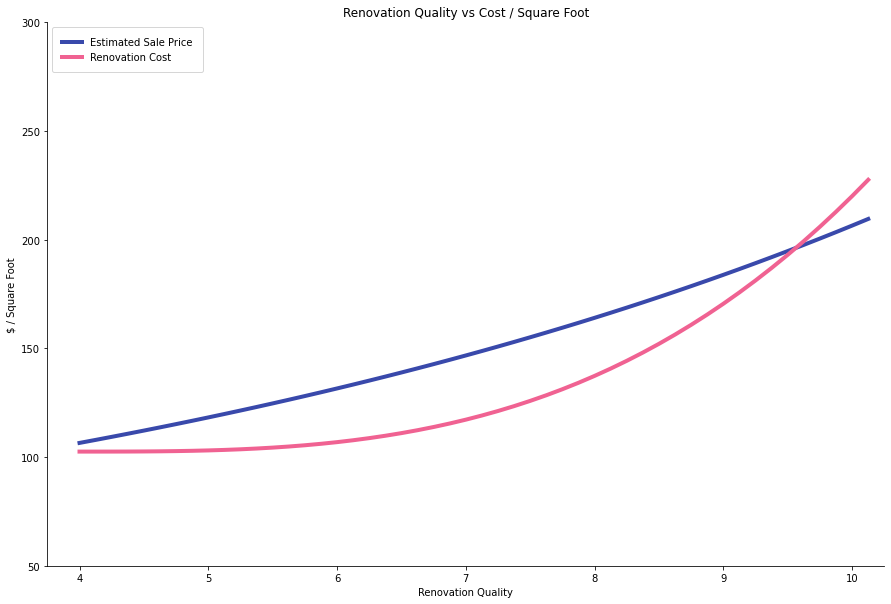

In [906]:
x = np.linspace(1, 100_000, 50)

def appreciating(a, b, x):
    return a + (b * x) ** 3

# Renovation vs quality estimator
gains = fix_to_reno['pred_sqft']
# cost = pd.Series(x).map(lambda __: appreciating(20, .000057, __))
cost = pd.Series(x).map(lambda __: appreciating(10, .00005, __))

cost_gain = pd.concat([cost, gains], axis=1)
cost_gain.rename({0: 'renovation_cost', 'pred_sqft': 'estimated_sale_price'}, axis=1, inplace=True)

cost_gain['purchase_price_sqft'] = fix_to_reno['p_sqft'][0]
cost_gain['sqft'] = fix_to_reno['gr_living_sqft'][0]
cost_gain['financing'] = fix_to_reno['price'][0] * 0.03
cost_gain['selling_fee'] = cost_gain['estimated_sale_price'] * cost_gain['sqft'] * .05

cost_gain['total_cost'] = round(
        ((cost_gain['renovation_cost'] + cost_gain['purchase_price_sqft']) * # add reno cost/sqft with purchase price/sqft
        cost_gain['sqft'][0]) + # multiply by total sqft
        (cost_gain['financing'][0] + cost_gain['selling_fee'][0]), 0).astype(int) # add financing, cost to sell, and minimum profit

cost_gain['cost_sqft'] = cost_gain['total_cost'] / cost_gain['sqft']


cost_gain['delta'] = cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']

cost_gain['sweet_spot'] = (cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']) * cost_gain['sqft']

plt.figure(figsize=(15, 10))
plt.plot(cost_gain.index, cost_gain['estimated_sale_price'], c='#3949ab', linewidth=4, label='Estimated Sale Price')
plt.plot(cost_gain.index, cost_gain['cost_sqft'], c='#f06292', linewidth=4, label = 'Renovation Cost')
plt.legend(loc='upper left', borderpad=1, )

plt.title('Renovation Quality vs Cost / Square Foot')
plt.xlabel('Renovation Quality')
plt.ylabel('$ / Square Foot')
plt.xticks(ticks=[0, 8, 16, 24, 32, 40, 48], labels=[4, 5, 6, 7, 8, 9, 10])

plt.xlim([-2, 50])
plt.ylim([50, 300])

sweet_spot = cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]
print(sweet_spot)

# plt.vlines(x=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])].index,
#            ymin=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['cost_sqft'],
#            ymax=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['estimated_sale_price'],
#            color='#d23369', linewidth=6)
           
sns.despine()

plt.savefig('./images/transparent_reno.png', transparent=True);


In [698]:
import datetime
import matplotlib.pyplot as plt

start_date = datetime.datetime(2007, 2, 1)
renovation_complete = start_date + datetime.timedelta(days=1) + datetime.timedelta(days=21)
marketing_complete = renovation_complete + datetime.timedelta(days=2) + datetime.timedelta(days=14)
sale_date = marketing_complete + datetime.timedelta(days=1) + datetime.timedelta(days=30)
minimum_timeline = sale_date - start_date

buffer = start_date + datetime.timedelta(days=90)

timeline = pd.DataFrame({
    'purchase': [start_date, start_date + datetime.timedelta(days=1)],
    'renovation_time': [start_date + datetime.timedelta(days=1), renovation_complete],
    'marketing': [renovation_complete + datetime.timedelta(days=1), marketing_complete],
    'escrow': [marketing_complete + datetime.timedelta(days=1), sale_date],
    'sale': [sale_date + datetime.timedelta(days=1), buffer]
}, index=['start', 'finish'])

timeline

,purchase,renovation_time,marketing,escrow,sale
start,2007-02-01,2007-02-02,2007-02-24,2007-03-12,2007-04-12
finish,2007-02-02,2007-02-23,2007-03-11,2007-04-11,2007-05-02


Text(2007-04-19 00:00:00, 0.99, '25 days')

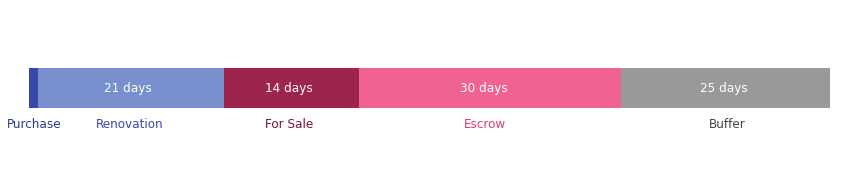

In [802]:
# Make Timeline
plt.figure(figsize=(15, 3))
plt.ylim([.75, 1.25])

# plt.yticks([])
plt.xlabel('')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.lineplot(data=timeline, x='purchase', y=1, linewidth=40, color='#3949ab')
sns.lineplot(data=timeline, x='renovation_time', y=1, linewidth=40, color='#7890cd')
sns.lineplot(data=timeline, x='marketing', y=1, linewidth=40, color='#9c254d')
sns.lineplot(data=timeline, x='escrow', y=1, linewidth=40, color='#f06292')
sns.lineplot(data=timeline, x='sale', y=1, linewidth=40, color='#999999')

plt.text(x=(timeline.loc['start', 'purchase'] - datetime.timedelta(days=5) ), y=.88, s='Purchase', color='#2a3990', fontsize=12)
plt.text(x=(timeline.loc['start', 'renovation_time'] + datetime.timedelta(days=4.5) ), y=.88, s='Renovation', color='#3949ab', fontsize=12)
plt.text(x=(timeline.loc['start', 'renovation_time'] + datetime.timedelta(days=5.5) ), y=.99, s='21 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'marketing'] + datetime.timedelta(days=2.5) ), y=.88, s='For Sale', color='#7c1337', fontsize=12)
plt.text(x=(timeline.loc['start', 'marketing'] + datetime.timedelta(days=2.5) ), y=.99, s='14 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'escrow'] + datetime.timedelta(days=10) ), y=.88, s='Escrow', color='#db3f74', fontsize=12)
plt.text(x=(timeline.loc['start', 'escrow'] + datetime.timedelta(days=9.5) ), y=.99, s='30 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'sale'] + datetime.timedelta(days=8) ), y=.88, s='Buffer', color='#434343', fontsize=12)
plt.text(x=(timeline.loc['start', 'sale'] + datetime.timedelta(days=7) ), y=.99, s='25 days', color='white', fontsize=12)

#### Coef exploration

In [825]:
coefs = pd.DataFrame(zip(poly.get_feature_names_out(), gs_r.best_estimator_.coef_), columns=['Feature', 'Weight']).sort_values(by='Weight', ascending=False)[80:100]
coefs

,Feature,Weight
1709,n_oldtown basement_fin_1,0.003930
2982,basement_fin_1 lot_sqft,0.003916
1543,n_nridght sale_type,0.003871
3025,kitchen condition,0.003865
3098,contour_level lot_sqft,0.003809
2404,garage_sqft condition,0.003785
2282,quality kitchen,0.003741
1187,n_brkside basement_fin_1,0.003732
2873,heating_qc alley_gravel,0.003709
1167,n_brkside garage_sqft,0.003708


##### sqft, neighborhood, and quality come up the most often. Of the featurse we can change, quality, basement finish and fireplace appear to have the strongest relationship to value. Quality makes sense, as the higher the quality the more a property will sell for. Basement finish ties into square feet being significant. We cant move the properties physically, so neighborhood will be difficult to adjust at a macro level. But the more properties we renovated, the nicer a neighborhood becomes.

#### Lets explore the specific affect of renovating a property that has a basement, but it is unfinished. So lets 'flip' the property overall condition, compare the standard flip (without basement) to the original value, and then compare further against renovating the basement.

In [907]:
# find fixer properties with basements between 0 & 3 level of finish, but at least 80" tall (basement_qual 3+)
fixers[(fixers['basement_fin_1'] < 3) & (fixers['basement_fin_1'] > 0) & (fixers['basement_qual'] >= 3)]

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,modern,neighborhood
52,782,905229040,50,70.0,11250,1,3,2,1,4,...,0.0,0.0,0.0,0.0,11.99226,90.324385,2009.92,1,0,ClearCr


#### one fixer fits our build, lets explore

In [908]:
renovated.loc[52,renovation_cols + ['price', 'total_basement_sqft', 'basement_qual']]

quality                      4
kitchen_qual               3.0
basement_qual              3.0
garage_finish                1
remod_year                1989
fireplace_qual             3.0
heating_qc                 5.0
basement_fin_sqft_1        0.0
sale_type                    2
basement_fin_1               1
condition                    5
electrical                   4
heating                      2
basement_fin_2               1
sold_year_mo           2009.92
basement_fin_sqft_2        0.0
price                   161500
total_basement_sqft     1104.0
basement_qual              3.0
Name: 52, dtype: object

#### Basement sqft unadjusted

In [914]:
# make new reno df
fix_to_reno = fixers.loc[[52,]].copy()
fix_to_reno = fix_to_reno.append([fix_to_reno]*49,ignore_index=True)
# dataframe duplication adapted from StackOverflow user: Karl D.

# build linear progression of quality
fix_to_reno['quality'] = list(np.linspace(4, 10, 50))
fix_to_reno['kitchen_qual'] = list(np.linspace(3, 10, 50))
fix_to_reno['basement_qual'] = list(np.linspace(3, 3, 50))
fix_to_reno['garage_finish'] = list(np.linspace(1, 3, 50))

fix_to_reno['remod_year'] = list(np.repeat((2009.92 + 2/12), 50))
fix_to_reno['fireplace_qual'] = list(np.linspace(3, 5, 50))
fix_to_reno['heating_qc'] = list(np.linspace(5, 5, 50))
fix_to_reno['basement_fin_sqft_1'] = list(np.repeat(0, 50))

fix_to_reno['sale_type'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_1'] = list(np.repeat(0, 50))
fix_to_reno['condition'] = list(np.linspace(5, 10, 50))
fix_to_reno['electrical'] = list(np.linspace(4, 5, 50))

fix_to_reno['heating'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_2'] = list(np.repeat(0, 50))
fix_to_reno['sold_year_mo'] = list(np.repeat((2009.92 + 3/12), 50))
fix_to_reno['basement_fin_sqft_2'] = list(np.repeat(0, 50))


# generate value predictions
fix_to_reno['pred'] = single_pred(fix_to_reno)
fix_to_reno['pred_sqft'] = fix_to_reno['pred'] / fix_to_reno['gr_living_sqft']


# basement adjusted & reduction of less impactful quals
# build linear progression of quality
fix_to_reno2 = fix_to_reno.copy()

# less improvements to make way for more basement improvements
fix_to_reno['kitchen_qual'] = list(np.linspace(3, 8, 50))
fix_to_reno['fireplace_qual'] = list(np.linspace(3, 3, 50))
fix_to_reno['garage_finish'] = list(np.linspace(1, 1, 50))
fix_to_reno['electrical'] = list(np.linspace(4, 4, 50))

fix_to_reno2['basement_fin_sqft_1'] = list(np.repeat(1104, 50))
fix_to_reno2['basement_fin_1'] = list(np.linspace(1, 6, 50))
# fix_to_reno2['basement_fin_2'] = list(np.linspace(1, 6, 50))

# generate value predictions
fix_to_reno2['pred'] = single_pred(fix_to_reno2)
fix_to_reno2['pred_sqft2'] = fix_to_reno2['pred'] / fix_to_reno2['gr_living_sqft']

Profit for optimal renovation budget: 27    14602.714406
Name: sweet_spot, dtype: float64
Profit for optimal renovation + basement reno budget: 30    46359.858125
Name: sweet_spot_basement, dtype: float64


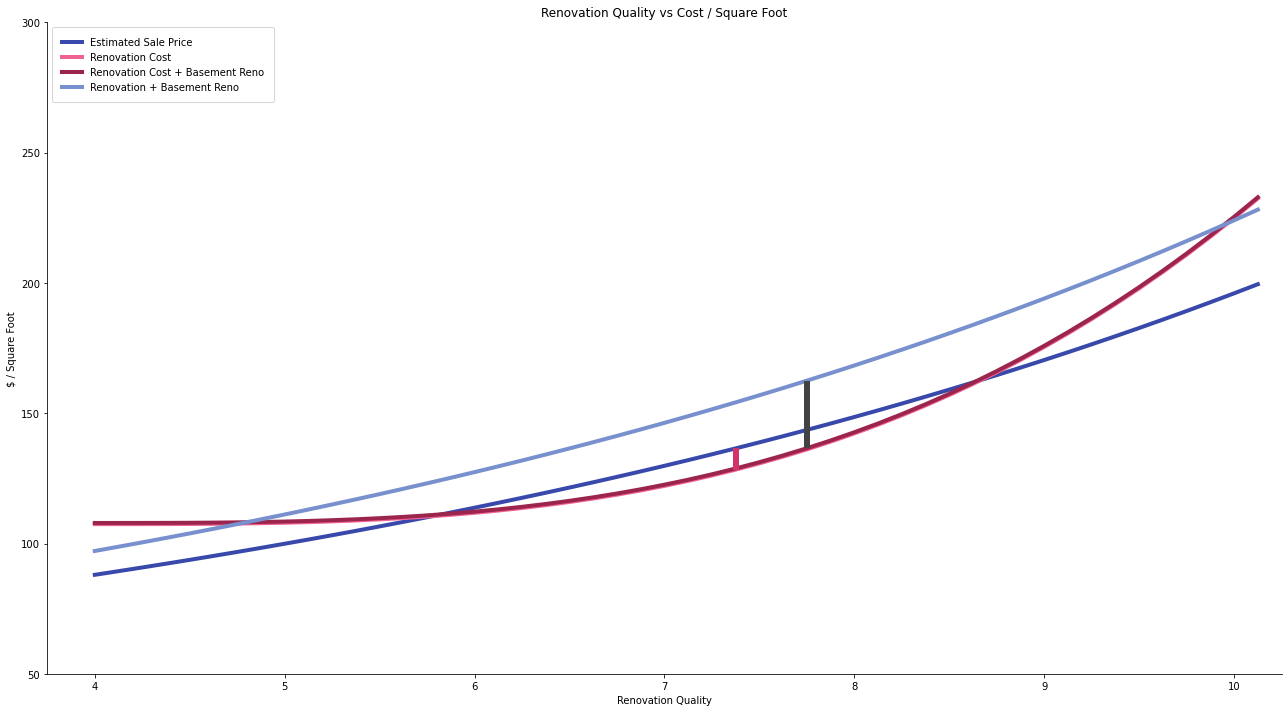

In [929]:
x = np.linspace(1, 100_000, 50)

def appreciating(a, b, x):
    return a + (b * x) ** 3

# Renovation vs quality estimator
gains = fix_to_reno['pred_sqft']
gains2 = fix_to_reno2['pred_sqft2']
cost = pd.Series(x).map(lambda __: appreciating(10, .00005, __))

cost_gain = pd.concat([cost, gains, gains2], axis=1)
cost_gain.rename({0: 'renovation_cost', 'pred_sqft': 'estimated_sale_price', 'pred_sqft2': 'est_sale_basement'}, axis=1, inplace=True)

# add expenses & sqft
cost_gain['purchase_price_sqft'] = fix_to_reno['p_sqft'][0]
cost_gain['sqft'] = fix_to_reno['gr_living_sqft'][0]
cost_gain['financing'] = fix_to_reno['price'][0] * 0.03
cost_gain['selling_fee'] = cost_gain['estimated_sale_price'] * cost_gain['sqft'] * .05
cost_gain['selling_fee2'] = cost_gain['est_sale_basement'] * cost_gain['sqft'] * .05

# no basement
cost_gain['total_cost'] = round(
        ((cost_gain['renovation_cost'] + cost_gain['purchase_price_sqft']) * # add reno cost/sqft with purchase price/sqft
        cost_gain['sqft'][0]) + # multiply by total sqft
        (cost_gain['financing'][0] + cost_gain['selling_fee'][0]), 0).astype(int) # add financing, cost to sell, and minimum profit

# with basement
cost_gain['total_cost2'] = round(
        ((cost_gain['renovation_cost'] + cost_gain['purchase_price_sqft']) * # add reno cost/sqft with purchase price/sqft
        cost_gain['sqft'][0]) + # multiply by total sqft
        (cost_gain['financing'][0] + cost_gain['selling_fee2'][0]), 0).astype(int) # add financing, cost to sell, and minimum profit


# per square foot total cost
# no basement
cost_gain['cost_sqft'] = cost_gain['total_cost'] / cost_gain['sqft']
# with basement
cost_gain['cost_sqft2'] = cost_gain['total_cost2'] / cost_gain['sqft']


# estimate profit curve
# no basement
cost_gain['delta'] = cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']
# with basement
cost_gain['delta2'] = cost_gain['est_sale_basement'] - cost_gain['cost_sqft2']

# isolate optimal cost curve
cost_gain['sweet_spot'] = (cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']) * cost_gain['sqft']
cost_gain['sweet_spot_basement'] = (cost_gain['est_sale_basement'] - cost_gain['cost_sqft2']) * cost_gain['sqft']


# plot
plt.figure(figsize=(18, 10))
plt.plot(cost_gain.index, cost_gain['estimated_sale_price'], c='#3949ab', linewidth=4, label='Estimated Sale Price')
plt.plot(cost_gain.index, cost_gain['cost_sqft'], c='#f06292', linewidth=4, label = 'Renovation Cost')


# # plot gains/cost with basement addition
plt.plot(cost_gain.index, cost_gain['cost_sqft2'], c='#9c254d', linewidth=4, label = 'Renovation Cost + Basement Reno')
plt.plot(cost_gain.index, cost_gain['est_sale_basement'], c='#7890cd', linewidth=4, label = 'Renovation + Basement Reno')

plt.legend(loc='upper left', borderpad=1)
plt.title('Renovation Quality vs Cost / Square Foot')
plt.xlabel('Renovation Quality')
plt.ylabel('$ / Square Foot')
plt.xticks(ticks=[0, 8, 16, 24, 32, 40, 48], labels=[4, 5, 6, 7, 8, 9, 10])

# Axis
plt.xlim([-2, 50])
plt.ylim([50, 300])

# Esimate Profits
sweet_spot = cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['sweet_spot']
sweet_basement = cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]['sweet_spot_basement']
print(f'Profit for optimal renovation budget: {sweet_spot}')
print(f'Profit for optimal renovation + basement reno budget: {sweet_basement}')

# Optimized Budget line
plt.vlines(x=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])].index,
           ymin=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['cost_sqft'],
           ymax=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['estimated_sale_price'],
           color='#d23369', linewidth=6, label='Optimized Profit Standard')

# Optimized Budget line for Basement Reno
plt.vlines(x=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])].index,
           ymin=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]['cost_sqft2'],
           ymax=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]['est_sale_basement'],
           color='#434343', linewidth=6, label='Optimized Profit w/ Basement')
           
sns.despine()
plt.tight_layout()
plt.savefig('./images/transparent_reno_yes_basement_yes_opti.png', transparent=True);